In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.io.fits as fitsio
from astropy.coordinates import SkyCoord
import astropy.units as u

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from importlib import reload
import sys
sys.path.append('/Users/nora/projects/stream_search/code')
import plot_density
reload(plot_density)
import streamlib
reload(streamlib)
import skymap
reload(skymap)
print(skymap.__version__)
import galstreams
reload(galstreams)

0.2.0


<module 'galstreams' from '/Users/nora/miniconda3/envs/py3/lib/python3.7/site-packages/galstreams-1.0.0-py3.7.egg/galstreams/__init__.py'>

In [8]:
mw_streams = galstreams.MWStreams(verbose=False)

In [9]:
plot_density.plot_pretty(figsize=(12,12))

In [10]:
# What's at 184, 69.4

# Testing Isochrone

In [54]:
# data = fitsio.read('../data/decals_dr8_m2_1.fits.gz')
# m2 = data
# data = np.loadtxt('../data/bass_ursaminor.txt')
data = fitsio.open('../data/ngc2419.fits.gz')[1].data
mag_sfd_g = data['MAG_SFD_G']
mag_sfd_r = data['MAG_SFD_R']
mag_sfd_z = data['MAG_SFD_Z']

In [55]:
# iso = np.loadtxt('/Users/nora/.ugali/isochrones/ps1/dotter2016/iso_a12.0_z0.00010.dat')
# g_ps1 = iso[:, 9]
# r_ps1 = iso[:, 10]
# i_ps1 = iso[:, 11]

# g_bass = g_ps1 + 0.00464 + 0.08672 * \
#     (g_ps1 - i_ps1) - 0.00668 * (g_ps1 - i_ps1) ** 2 - \
#     0.00255 * (g_ps1 - i_ps1) ** 3
# r_bass = r_ps1 + 0.00110 - 0.06875 * \
#     (g_ps1 - i_ps1) + 0.02480 * (g_ps1 - i_ps1)**2 - \
#     0.00855 * (g_ps1 - i_ps1)**3

# g2 = g_bass
# r2 = r_bass

/Users/nora/.ugali/isochrones/ps1/dotter2016/iso_a13.0_z0.00010.dat
/Users/nora/.ugali/isochrones/ps1/dotter2016/iso_a13.0_z0.00010.dat


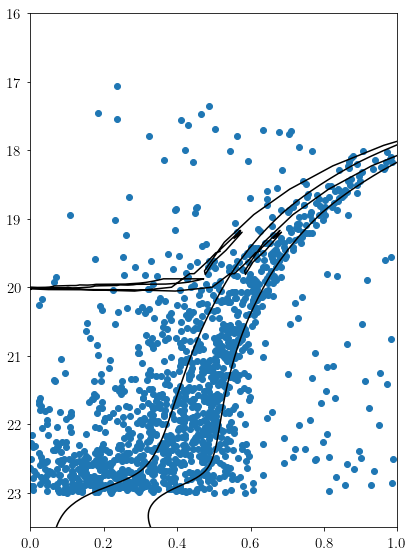

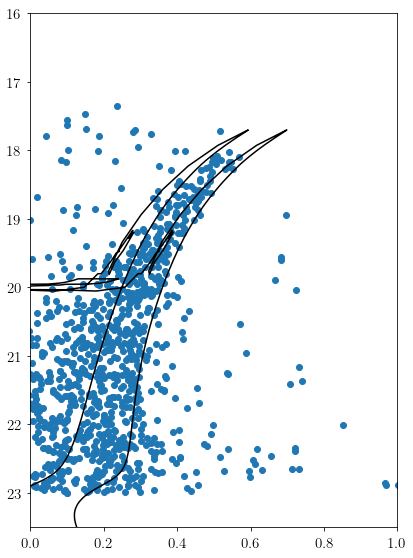

In [56]:
import filter_data
reload(filter_data)

mu, age, z = 19.6, 13.0, 0.0001
mk = filter_data.mkpol(mu=mu, age=age, z=z, dmu=0.5, C=[0.05, 0.05], E=2., err=err, survey='BASS')
mk_grz = filter_data.mkpol_grz(mu=mu, age=age, z=z, dmu=0.5, C=[0.05, 0.05], E=2., err=err, survey='BASS')

plt.figure(figsize=(6,8))
plt.xlim(0,1)
plt.ylim(23.5, 16)

plt.scatter(mag_sfd_g-mag_sfd_r, mag_sfd_g)
plt.plot(mk[:,0], mk[:,1]+mu, c='k')

plt.figure(figsize=(6,8))
plt.xlim(0,1)
plt.ylim(23.5, 16)

plt.scatter(mag_sfd_r-mag_sfd_z, mag_sfd_g)
plt.plot(mk_grz[:,0], mk_grz[:,1]+mu, c='k')

plt.show()

In [57]:
np.max(mag_sfd_r-mag_sfd_z)

nan

# Filtered Data

In [11]:
# filename = '/Users/nora/projects/stream_search/data/decals_dr8_iso_hpxcube_v3.fits.gz'
# filename = '/Users/nora/projects/stream_search/data/bass_dr8_iso_hpxcube_v4.fits.gz'
filename = '/Users/nora/projects/stream_search/data/bass_dr8_iso_hpxcube_v6.fits.gz'
hpxcube, fracdet, modulus = plot_density.load_hpxcube(filename)

filename = '/Users/nora/projects/stream_search/data/bass_dr8_iso_hpxcube_v5.fits.gz'
hpxcube_deep, fracdet, modulus = plot_density.load_hpxcube(filename)

# filename = '/Users/nora/projects/stream_search/data/bass_dr8_iso_hpxcube_v0.fits.gz' # 0.0004
# hpxcube0, fracdet, modulus = plot_density.load_hpxcube(filename)

# filename = '/Users/nora/projects/stream_search/data/bass_dr8_iso_hpxcube_v1.fits.gz' # 0.0001
# hpxcube_mp, fracdet, modulus = plot_density.load_hpxcube(filename)

# filename = '/Users/nora/projects/stream_search/data/bass_dr8_iso_hpxcube_v2.fits.gz' # 0.001
# hpxcube_mr, fracdet, modulus = plot_density.load_hpxcube(filename)

Reading /Users/nora/projects/stream_search/data/bass_dr8_iso_hpxcube_v6.fits.gz...
Skipping fracdet...
Reading /Users/nora/projects/stream_search/data/bass_dr8_iso_hpxcube_v5.fits.gz...
Skipping fracdet...


In [12]:
from __future__ import division
plt.figure(figsize=(6,4))
plt.hist(hpxcube[:,10]/hpxcube0[:,10], bins=np.arange(0,2, 0.1), histtype='step', lw=3)
plt.show()

NameError: name 'hpxcube0' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
modulus.shape

In [ ]:
mw_streams.keys()

In [66]:
mu = 16.0
data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=True, center=True, sgr=False, bmax=25, cmax=40)
bkg = 0

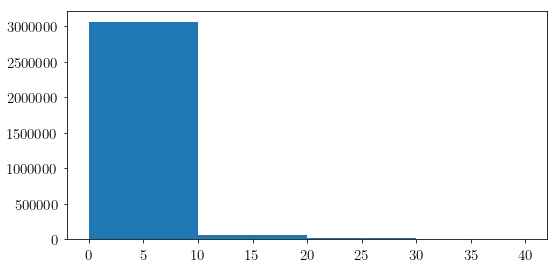

In [62]:
plt.figure(figsize=(8,4))
plt.hist(data, bins=np.arange(0,50,10))
plt.show()

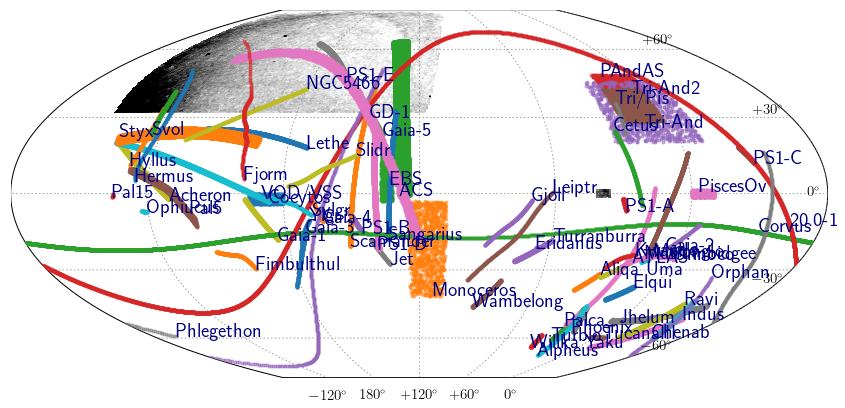

In [63]:
smap = plot_density.plot_density(data, bkg, center=(120,30), vmax=12)

# plot_density.plot_stream_list(smap, ['GD-1'])
plot_density.plot_streams(smap, mu, dmu=100)

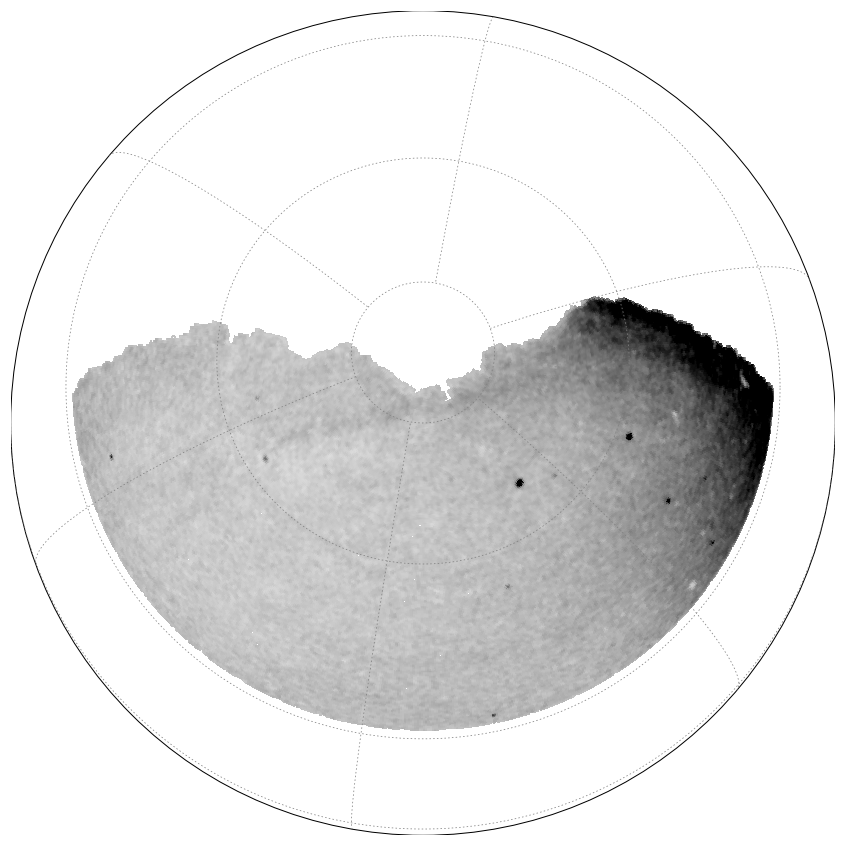

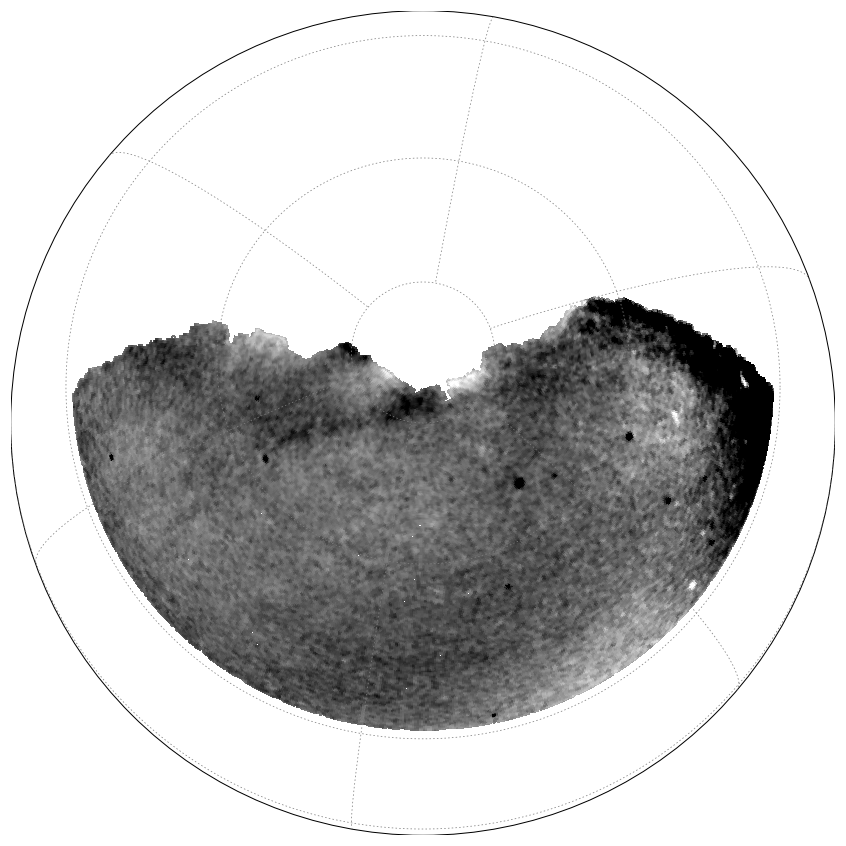

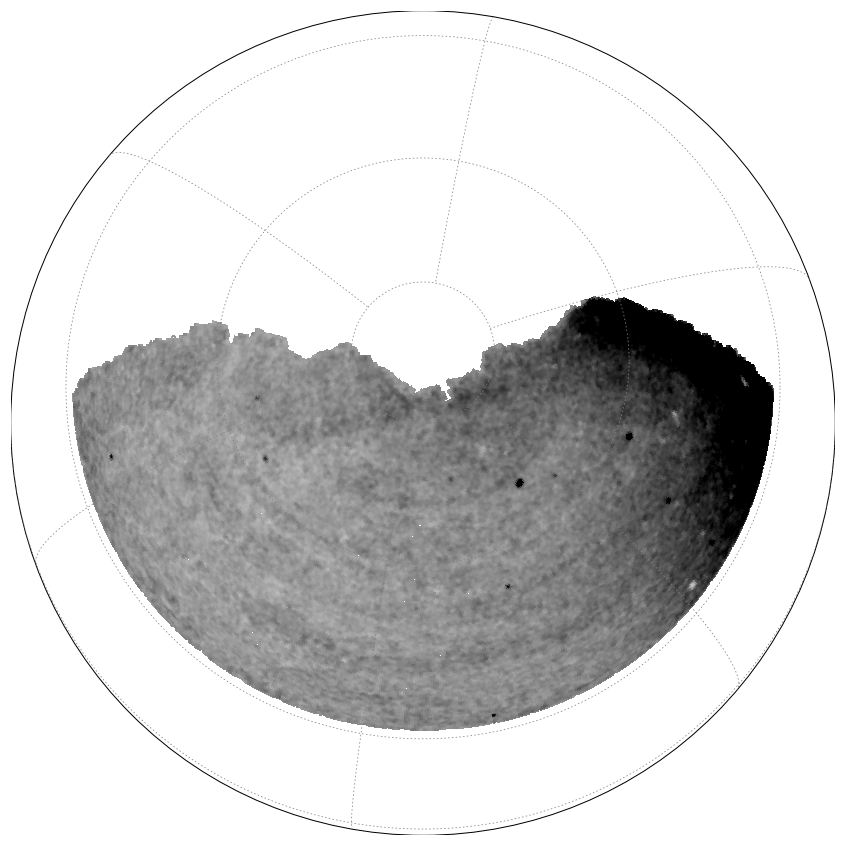

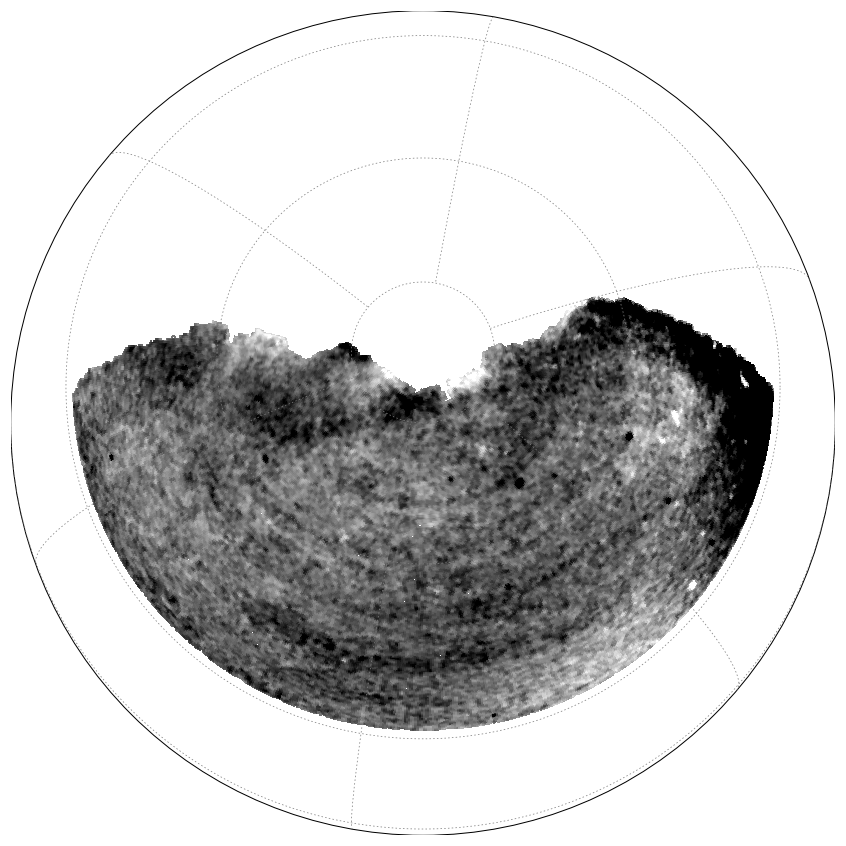

In [12]:
reload(plot_density)
coords='cel'
lon, lat = 190, 80
center=(lon,lat)
xsize = 1000
sigma = 0.2
mu = 16
stream = None

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
bkg = 0
vmin, vmax = 0, 20
smap = plot_density.plot_density(data, bkg, center=(lon,lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)

bkg = plot_density.fit_background(data, center=center, coords=coords, coord_stream=stream, sigma=sigma, deg=5)
vmin, vmax = -5, 3
smap = plot_density.plot_density(data, bkg, center=(lon,lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)

##########

data_deep = plot_density.prepare_hpxmap(mu, hpxcube_deep, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
bkg_deep = 0
vmin, vmax = 0, 20
smap = plot_density.plot_density(data_deep, bkg_deep, center=(lon,lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)

bkg_deep = plot_density.fit_background(data_deep, center=center, coords=coords, coord_stream=stream, sigma=sigma, deg=5)
vmin, vmax = -5, 3
smap = plot_density.plot_density(data_deep, bkg_deep, center=(lon,lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)

##########

# smap = plot_density.plot_density(data, bkg, center=(lon,lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)
# plot_density.plot_dwarfs_globs(smap, data, mu, 50, coords=coords, coord_stream=stream)

# smap = plot_density.plot_density(data, bkg, center=(lon,lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)
# plot_density.plot_streams(smap, mu, 50, coords=coords)

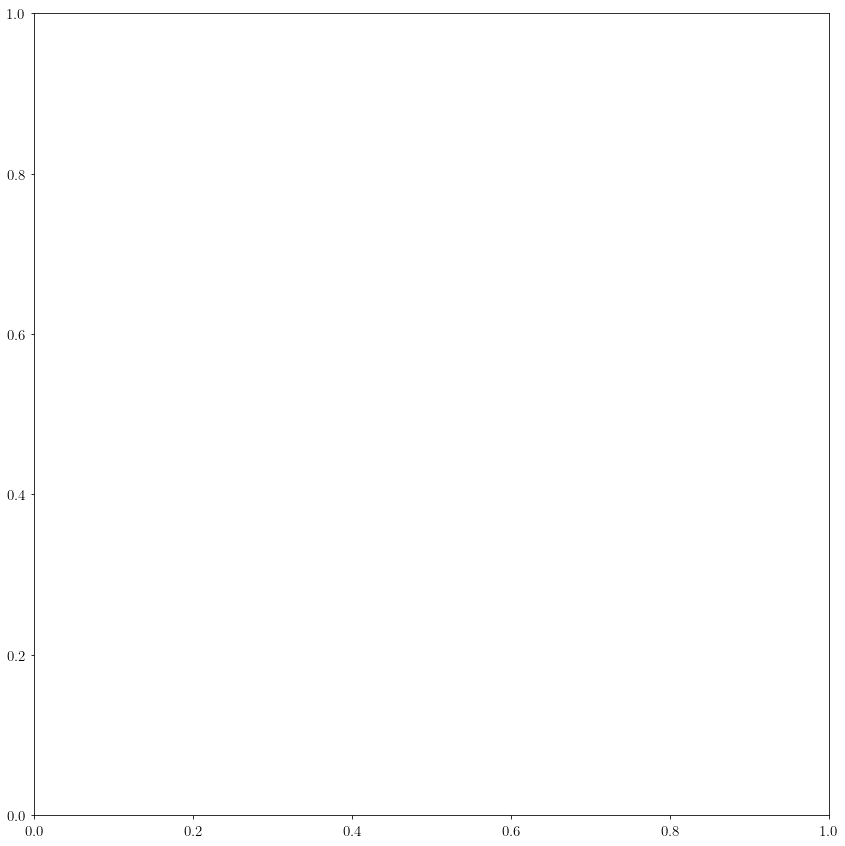

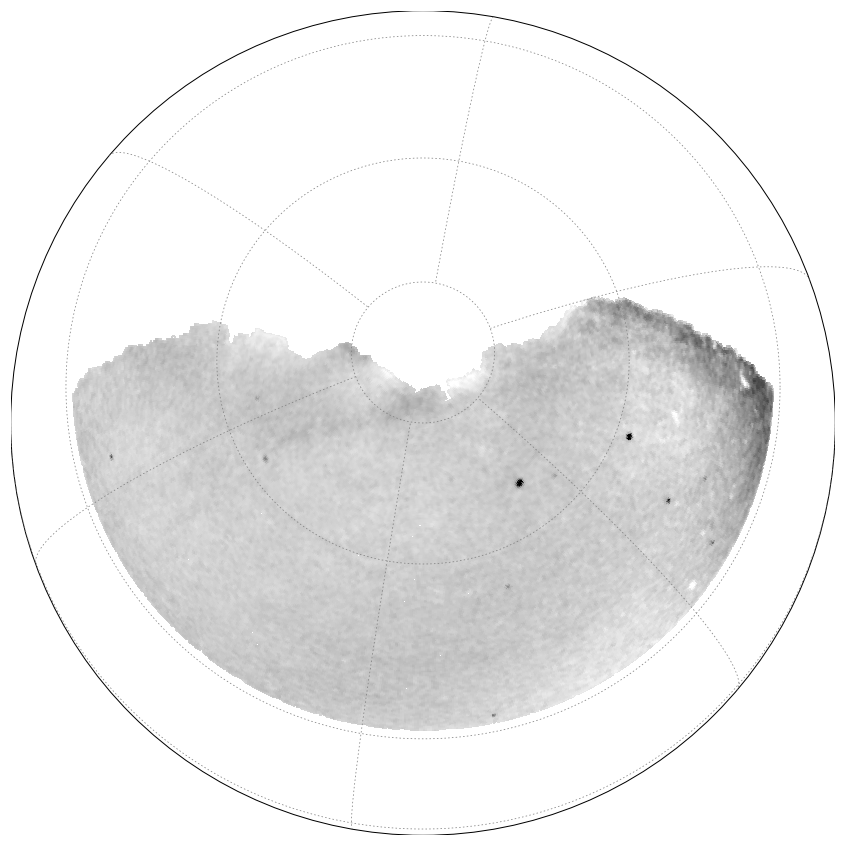

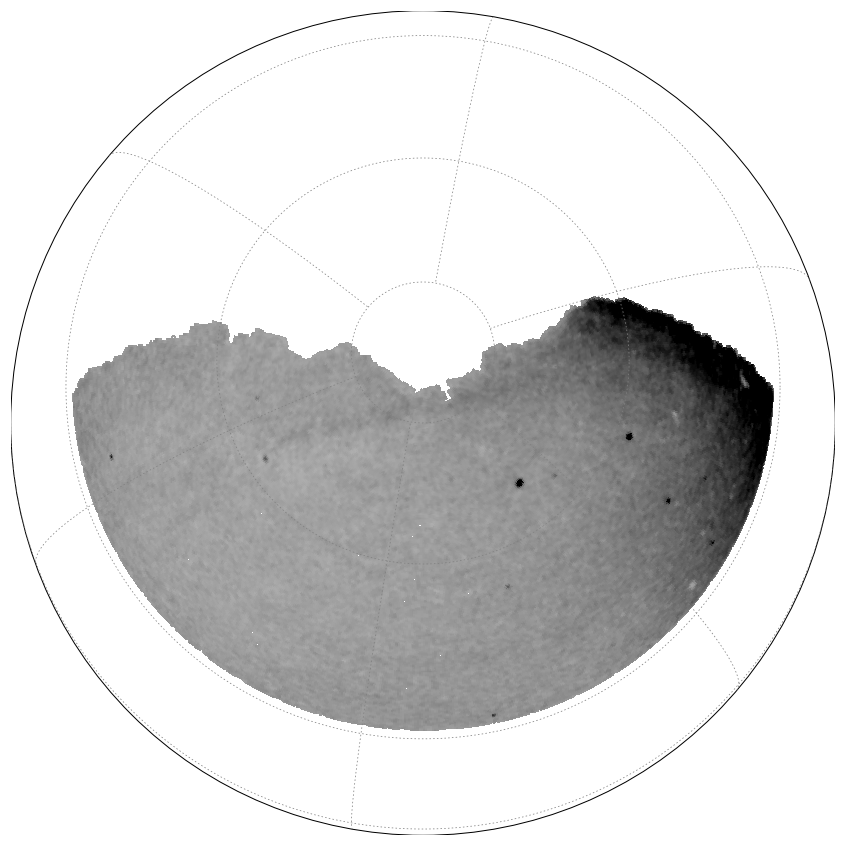

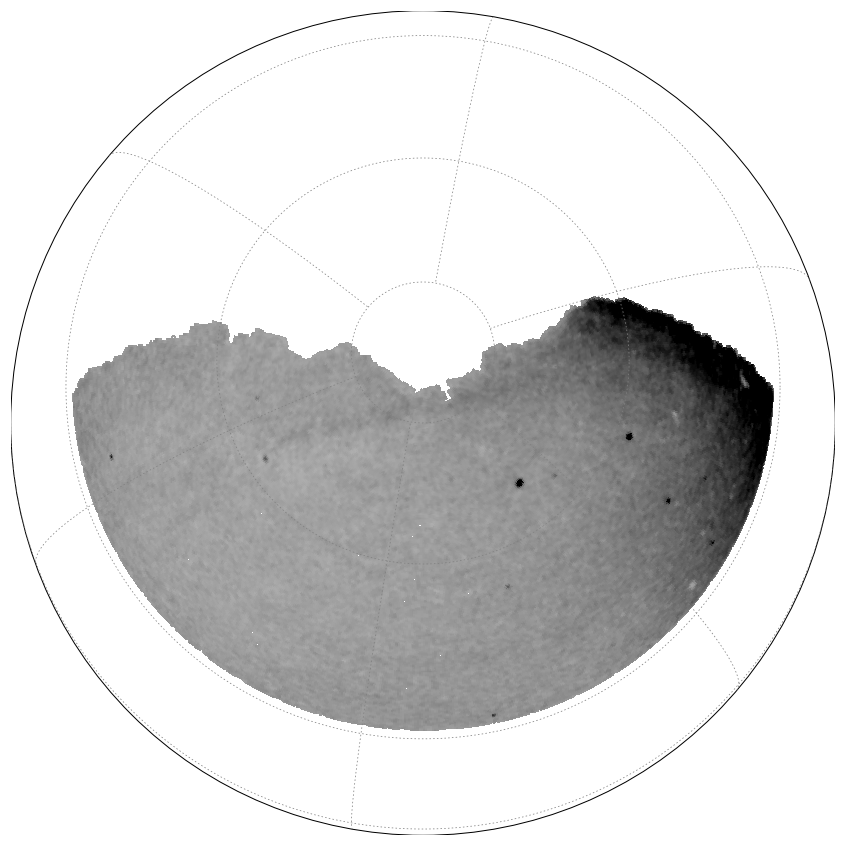

In [23]:
reload(plot_density)
coords='cel'
proj='ortho'
lon, lat = 190, 80
center=(lon,lat)
vmin, vmax = -5, 20
xsize = 1000
sigma = 0.2
mu = 16
stream = None

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
bkg = plot_density.fit_background(data, center=center, coords=coords, coord_stream=stream, sigma=sigma, deg=5)
bkg2 = plot_density.fit_background(data, center=center, coords=coords, coord_stream=stream, sigma=sigma, deg=5, proj='ortho')
smap = plot_density.plot_density(data, bkg, center=(lon,lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)
smap = plot_density.plot_density(data, bkg2, center=(lon,lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)
smap = plot_density.plot_density(data, 0, center=(lon,lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)
# smap = plot_density.plot_density(bkg, 0, center=(lon,lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)

# data = plot_density.prepare_hpxmap(mu, hpxcube_mp, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
# bkg = plot_density.fit_background(data, center=center, coords=coords, coord_stream=stream, sigma=sigma, deg=5)
# smap = plot_density.plot_density(data, bkg, center=(lon,lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)

# data = plot_density.prepare_hpxmap(mu, hpxcube_mr, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
# bkg = plot_density.fit_background(data, center=center, coords=coords, coord_stream=stream, sigma=sigma, deg=5)
# smap = plot_density.plot_density(data, bkg, center=(lon,lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)


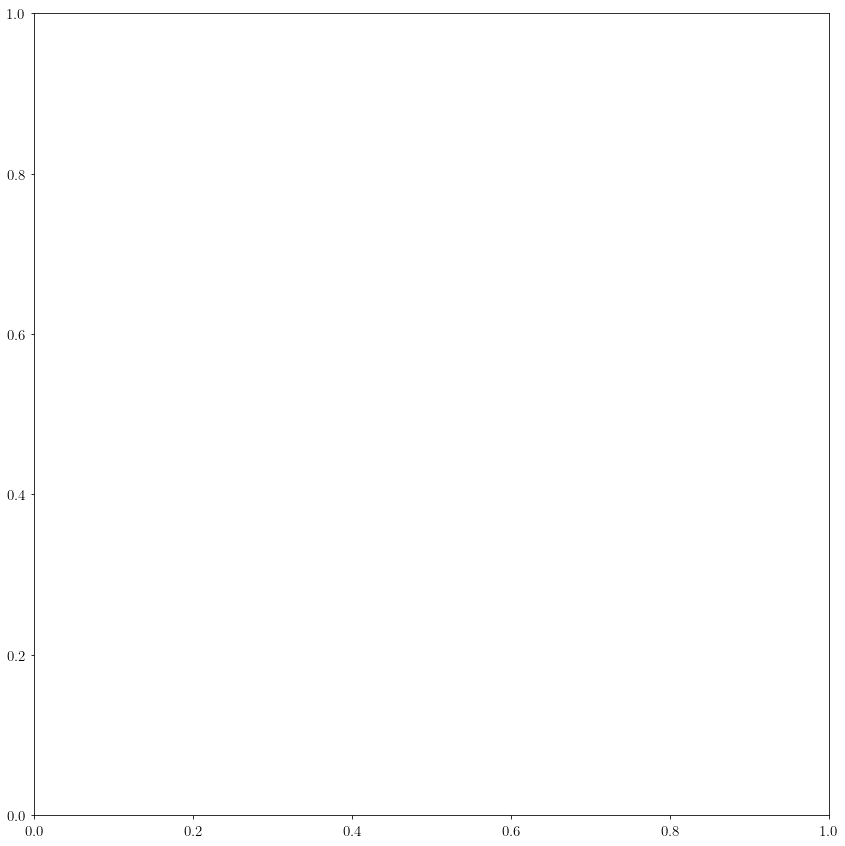

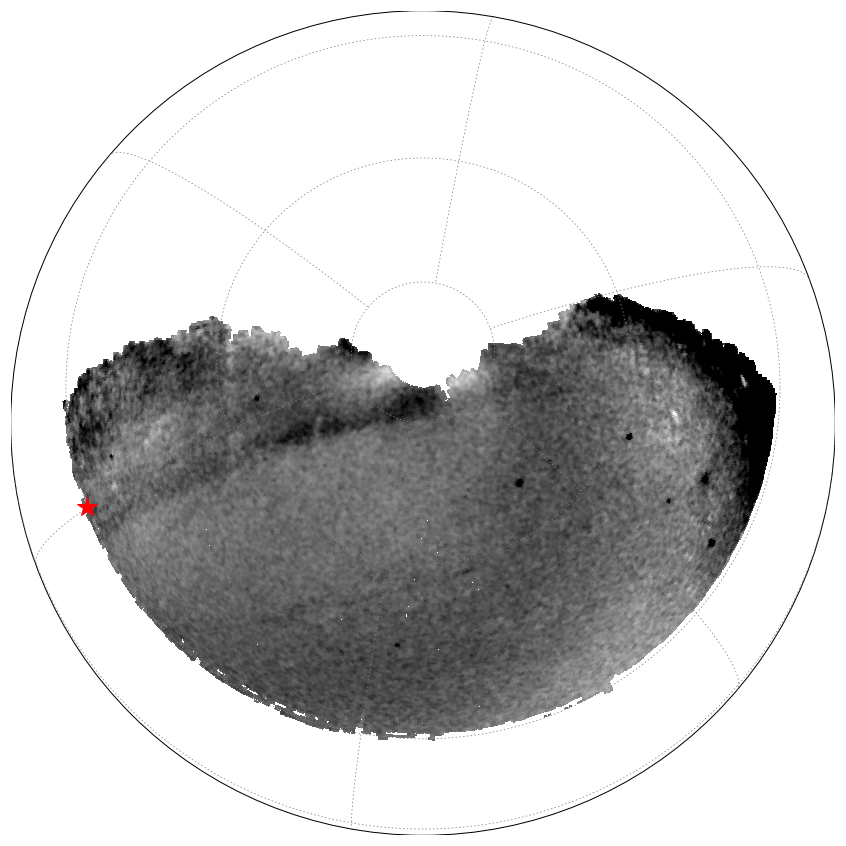

In [233]:
reload(plot_density)
coords='cel'
coord_stream = stream = 'GD-1'
lon, lat = 190, 80
center=(lon,lat)
vmin, vmax = -5, 3
xsize = 1000
sigma = 0.2
mu = 15
# stream = None

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
bkg = plot_density.fit_background(data, center=center, coords=coords, coord_stream=stream, sigma=sigma, deg=5)

smap = plot_density.plot_density(data, bkg, center=(lon,lat), vmin=vmin, vmax=vmax, coords=coords, coord_stream=stream, proj='ortho', xsize=xsize, smooth=sigma)
# x, y = smap(255, 48)
# smap.plot(x, y, 'r*', ms=20)
# x, y = smap(255-50, 48)
# smap.plot(x, y, 'r*', ms=20)

# x, y = smap(202, 58)
# smap.plot(x, y, 'r*', ms=20)
# x, y = smap(205, 58)
# smap.plot(x, y, 'r*', ms=20)

# x, y = smap(data_new1['RA'][on], data_new1['DEC'][on])
# smap.scatter(x, y, alpha=0.1)
# x, y = smap(data_new1['RA'][off], data_new1['DEC'][off])
# smap.scatter(x, y, alpha=0.1)

# x, y = smap(data_gd1['RA'][on], data_gd1['DEC'][on])
# smap.scatter(x, y, alpha=0.1)
# x, y = smap(data_gd1['RA'][off], data_gd1['DEC'][off])
# smap.scatter(x, y, alpha=0.1)

x, y = smap(180, 80)
smap.plot(x, y, 'r*', ms=20)
x, y = smap(120, 30)
smap.plot(x, y, 'r*', ms=20)

# smap = plot_density.plot_density(data, 0, center=(lon, lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize)
# plot_density.plot_stream_list(smap, ['ACS'], coords=coords)

# smap = plot_density.plot_density(data, 0, center=(lon, lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)
# plot_density.plot_streams(smap, mu, 50, coords=coords)

In [158]:
255-50, 48+5+5

(205, 58)

# GD-1 Test

In [216]:
data_gd1 = fitsio.open('../data/gd1_clump_data.fits')[1].data
data = np.copy(data_gd1)

In [180]:
from surveys import surveys
survey = 'BASS'

C = surveys[survey]['C']
E = surveys[survey]['E']
err = surveys[survey]['err']

mu = 15.1
idx = filter_data.select_isochrone(data_gd1['MAG_SFD_G'], data_gd1['MAG_SFD_R'], err, iso_params=[mu, 12.5, 0.0001], dmu=0.5, C=[0.01, 0.01], E=2, gmin=None, survey='DECaLS')

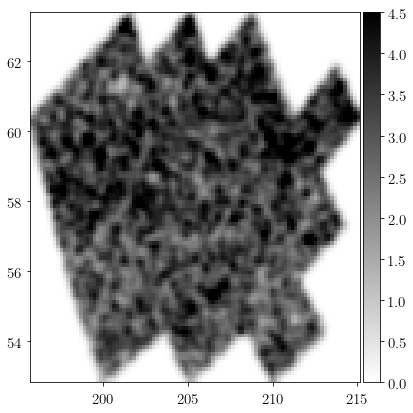

In [209]:
from scipy.ndimage import gaussian_filter

plt.figure(figsize=(6,6))
hist, bx, by = np.histogram2d(data_gd1['RA'][idx], data_gd1['DEC'][idx], bins=100)
smooth = gaussian_filter(hist, 1)
im = plt.imshow(smooth.T, origin='upper', aspect='auto', extent=[bx.min(), bx.max(), by.min(), by.max()], interpolation='none', cmap='binary', rasterized=True, vmax=4.5)
plot_hess.colorbar(im)

# plt.hist2d(data_gd1['RA'][idx], data_gd1['DEC'][idx], bins=100, vmax=5, cmap='binary')
plt.show()

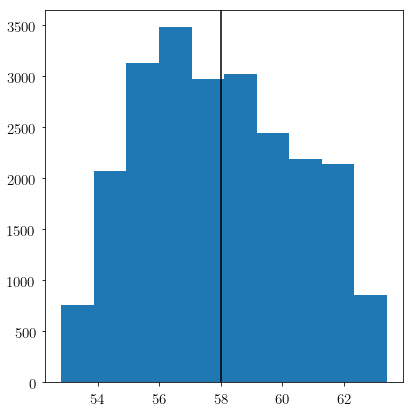

In [212]:
plt.figure(figsize=(6,6))
plt.hist(data['DEC'][idx])
plt.axvline(58, c='k')
plt.show()

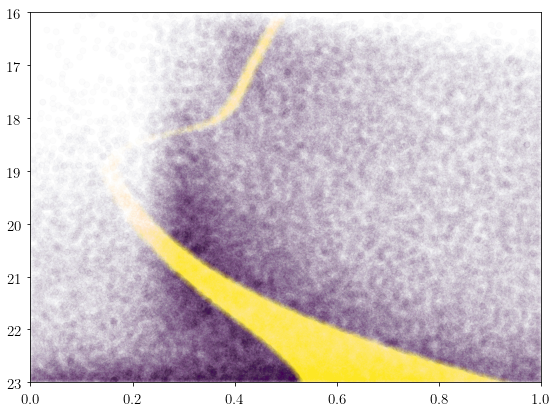

In [201]:
plt.figure(figsize=(8,6))
plt.scatter(data_gd1['MAG_SFD_G']-data_gd1['MAG_SFD_R'], data_gd1['MAG_SFD_G'], alpha=0.01, c=idx)
plt.xlim(0,1)
plt.ylim(23,16)
plt.show()

In [229]:
data = np.copy(data_gd1)

x1, y1 = 202, 58
x2, y2 = 205, 58

on = (data['RA'] > 200) & (data['RA'] < 204) & (data['DEC'] > 58) & (data['DEC'] < 60)
off = (data['RA'] > 199) & (data['RA'] < 206) & (data['DEC'] > 61) & (data['DEC'] < 63)


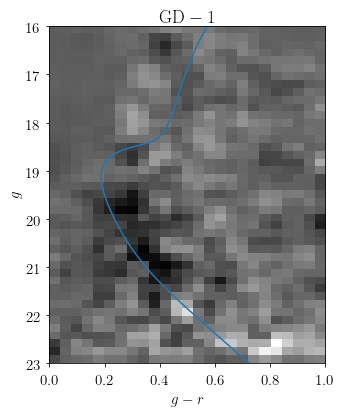

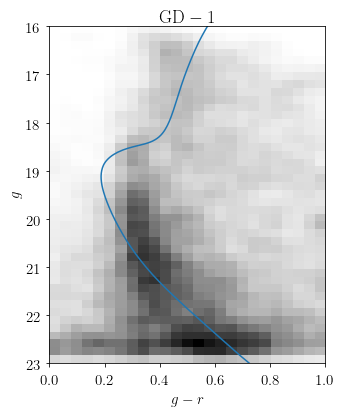

In [230]:
mu, age, z = 15.1, 12, 0.0004
iso = filter_data.isochrone_factory('Dotter', age=age, distance_modulus=mu, z=z)

plot_hess.plot_hess('GD-1', data[on], data[off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)
plt.plot(iso.color, iso.mag+mu)
plt.xlim(0,1)
plt.ylim(23,16)

plot_hess.plot_hess('GD-1', data[on], None, gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)
plt.plot(iso.color, iso.mag+mu)
plt.xlim(0,1)
plt.ylim(23,16)

plt.show()


# ACS

In [250]:
import healpy as hp
from ugali.utils import healpix
pix = np.arange(hp.nside2npix(32))
ra, dec = hp.pix2ang(32, pix, lonlat=True)
phi1, phi2 = rotation_matrix.phi12_rotmat(ra, dec, R)
sel = np.abs(phi2) < 10
print(sel.size, sel.sum())

np.savetxt('acs_pix.dat', pix[sel])
!pwd


12288 2132
/Users/nora/projects/stream_search/notebooks


In [235]:
ends = [[120,30],[180,80]]
R = streamlib.get_rotmat(ends=ends)
print(R)

[[-0.34262098  0.42357394  0.83856782]
 [-0.27890134  0.80649427 -0.52132623]
 [-0.89712034 -0.41249499 -0.15818652]]


In [ ]:
R = np.array([[-0.34262098,  0.42357394,  0.83856782],
 [-0.27890134,  0.80649427, -0.52132623],
 [-0.89712034, -0.41249499, -0.15818652]])

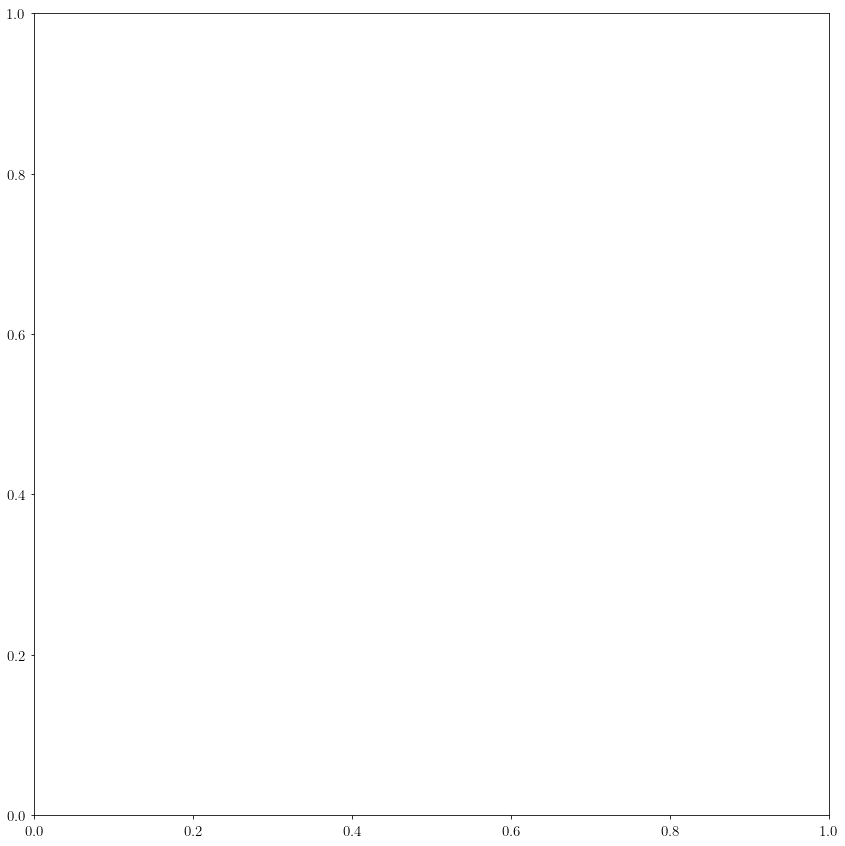

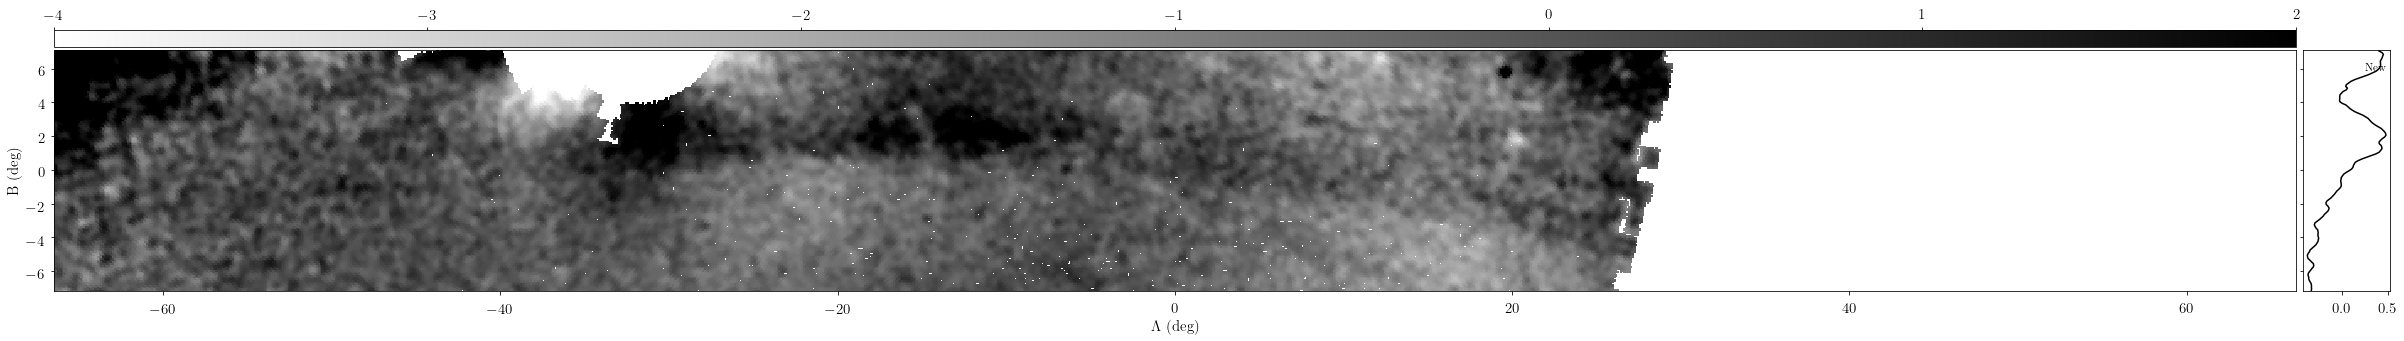

In [238]:
ax = plot_density.plot_stream_zoom(hpxcube, fracdet, modulus, stream=None, ends=ends, mu=mu, width=1, sigma=0.2, delta=0.1, vmin=-4, vmax=2)

In [253]:
data_acs = fitsio.open('../data/acs_data_2.fits.gz')[1].data

In [254]:
data = np.copy(data_acs)

In [256]:
phi1, phi2 = rotation_matrix.phi12_rotmat(data['RA'], data['DEC'], R)

-10 -8


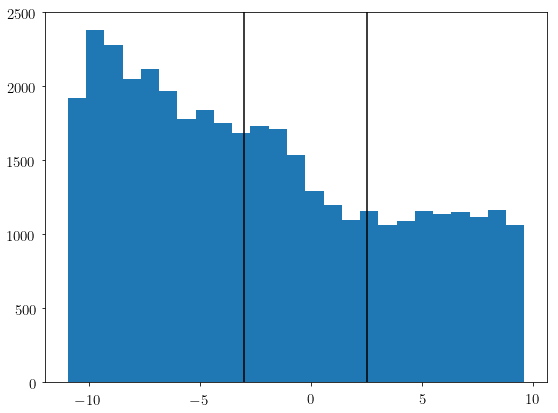

-9 -7


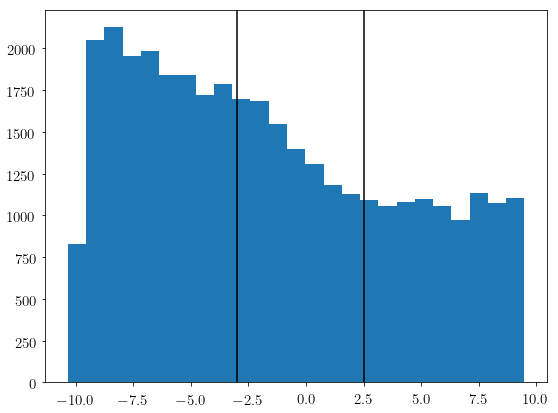

-8 -6


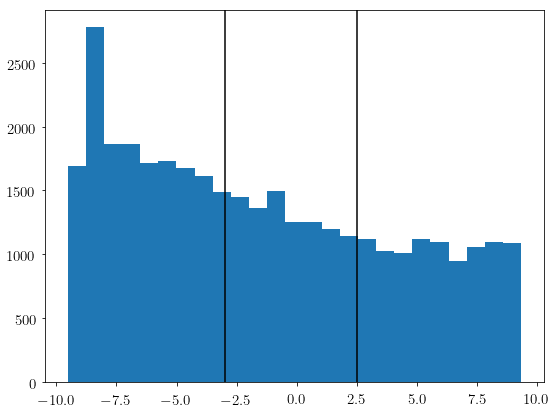

-7 -5


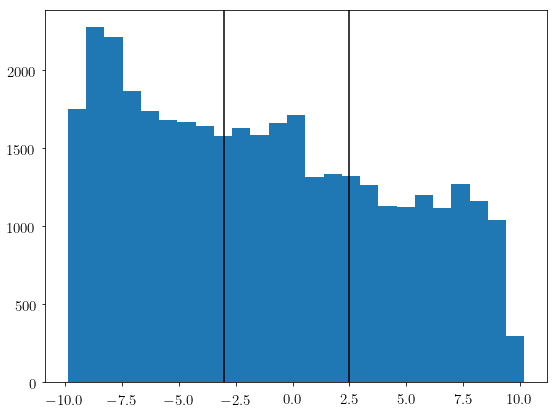

-6 -4


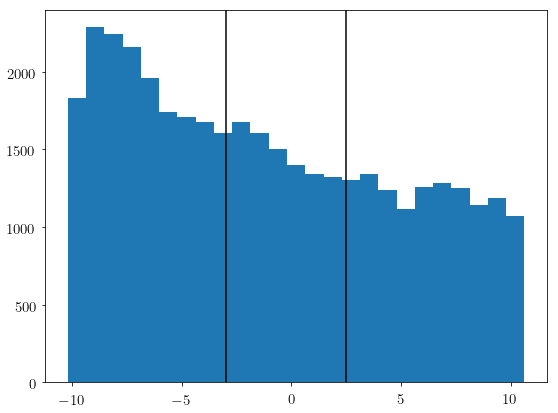

-5 -3


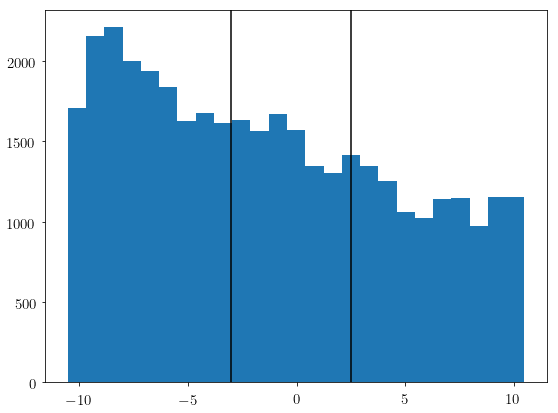

-4 -2


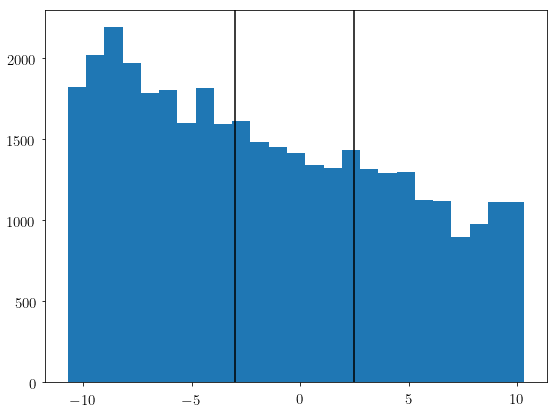

-3 -1


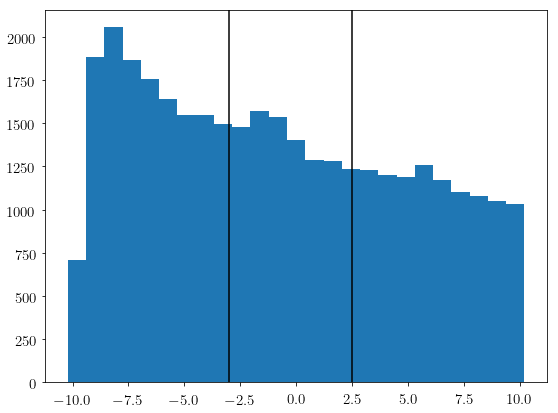

-2 0


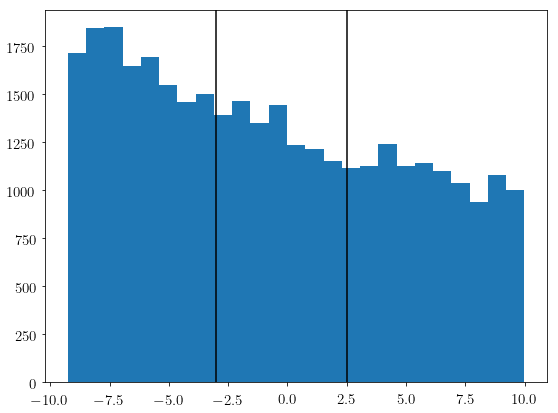

-1 1


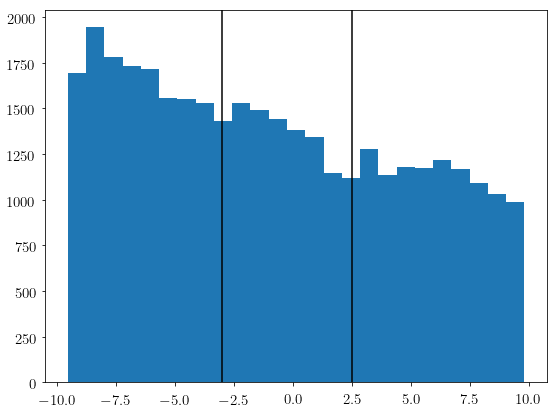

0 2


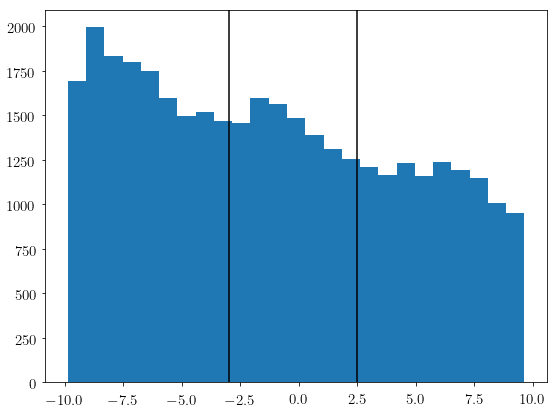

1 3


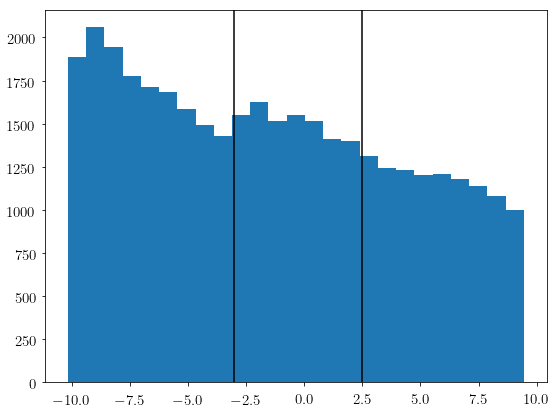

2 4


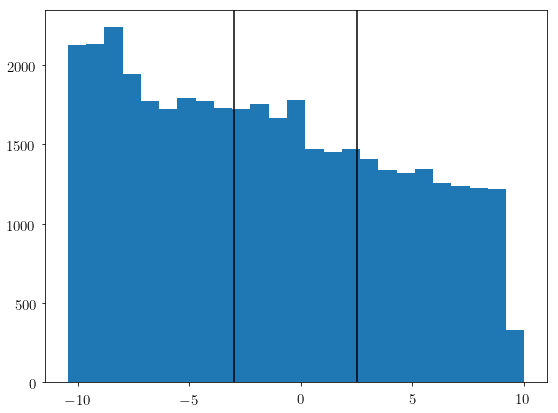

3 5


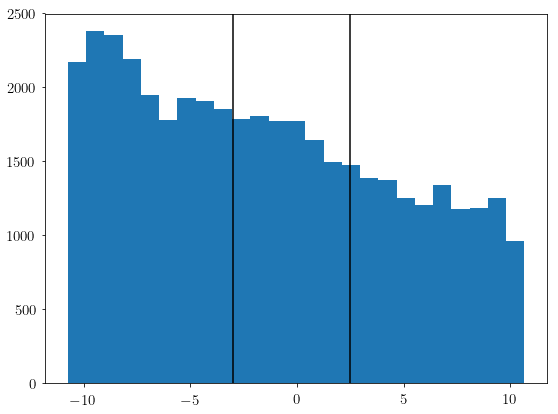

4 6


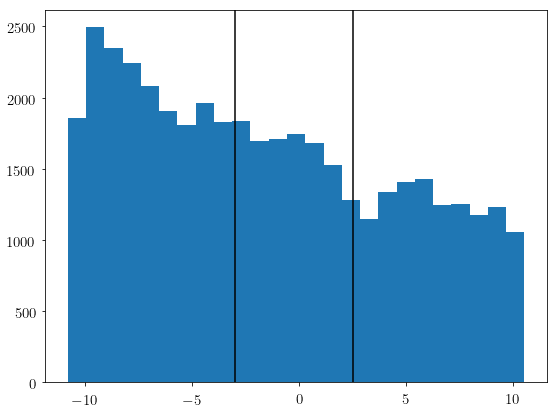

5 7


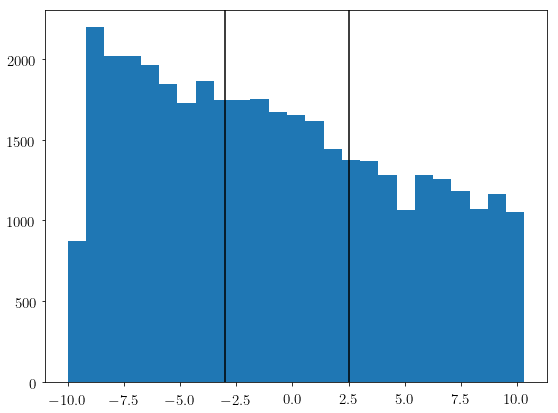

6 8


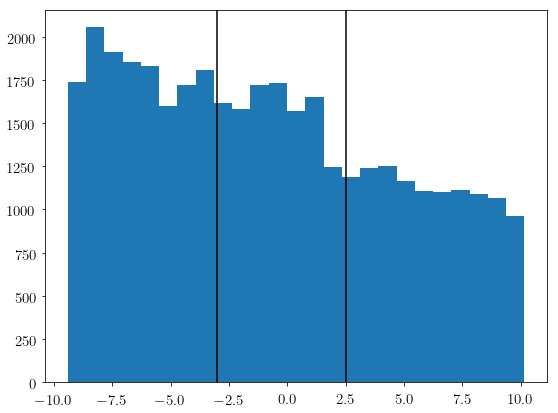

7 9


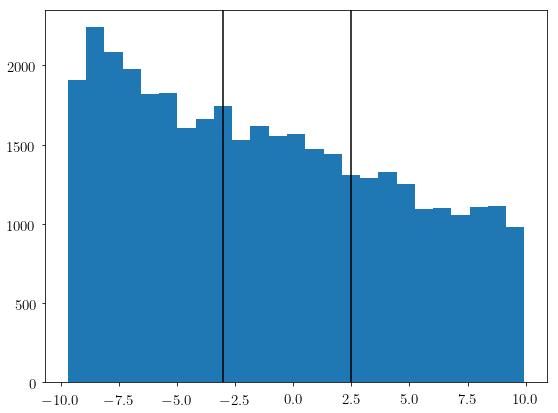

8 10


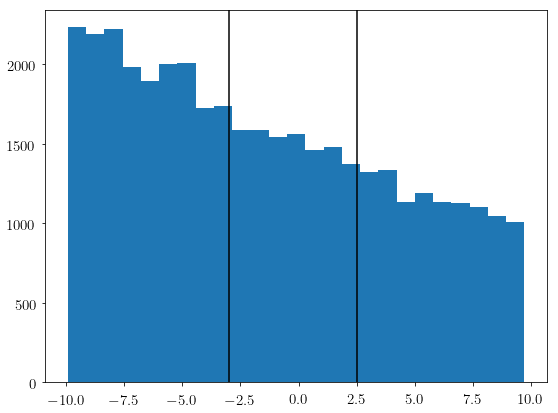

9 11


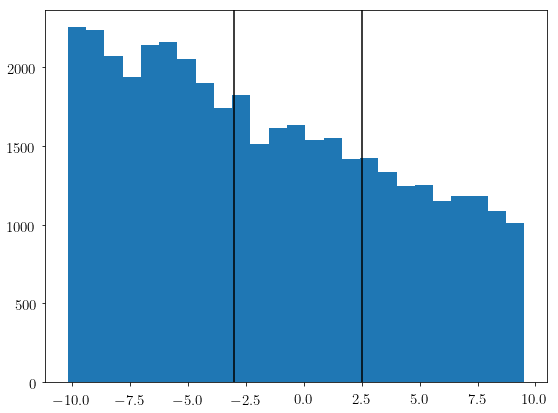

In [260]:
for i in np.arange(-10,10):    
    plt.figure(figsize=(8,6))
    print(i, i+2)
    plt.hist(phi2[(phi1 > i) & (phi1 < (i + 1))], bins=25)
    plt.axvline(-3, c='k')
    plt.axvline(2.5, c='k')
    # plt.ylim(250,350)
    plt.show()

In [261]:
on = (phi1 > -3) & (phi1 < -1) & (phi2 > -3) & (phi2 < 2.5)
# off = (phi1 > -3) & (phi1 < -1) & (np.abs(phi2) > 1) & (np.abs(phi2) < 1.5)
# off1 = (phi1 > -3) & (phi1 < -1) & (phi2 > 1) & (phi2 < 1.5)
off = (phi1 > -3) & (phi1 < -1) & (phi2 < -5) & (phi2 > -8)

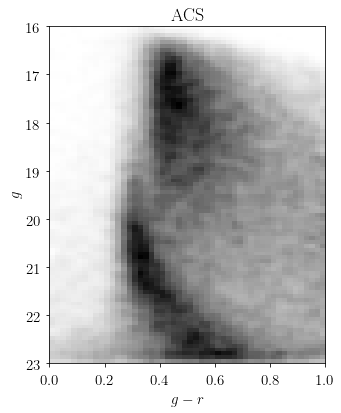

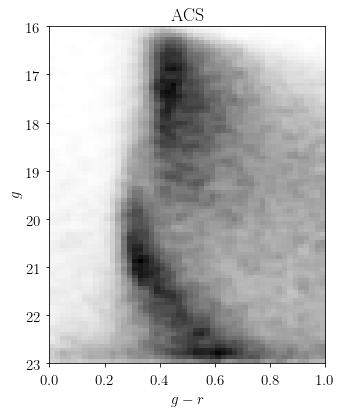

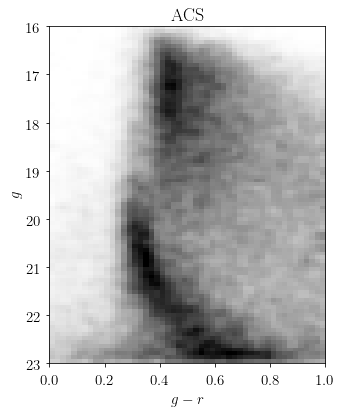

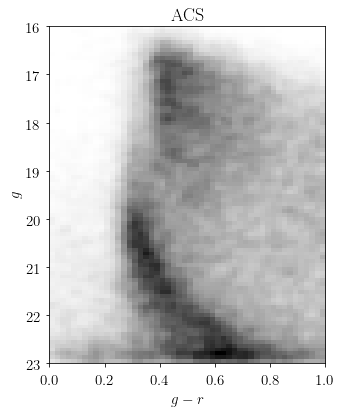

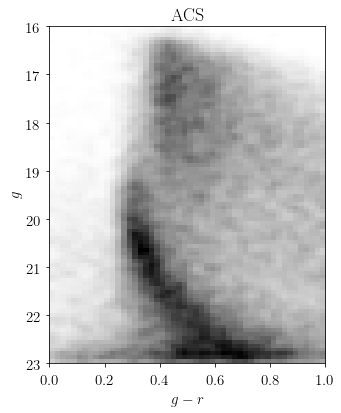

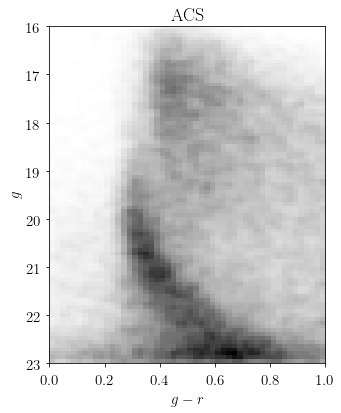

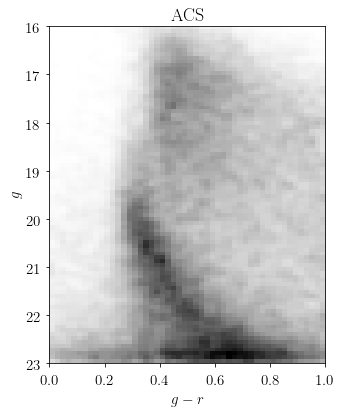

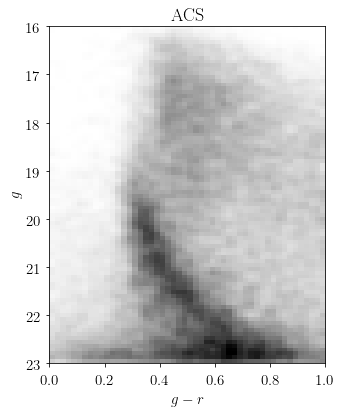

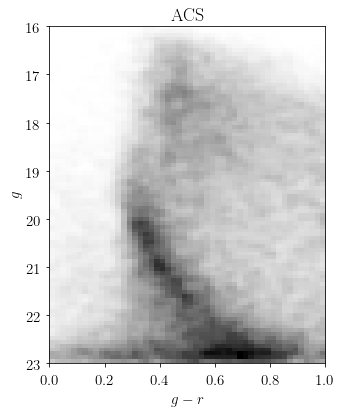

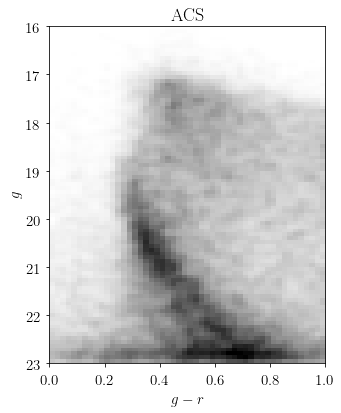

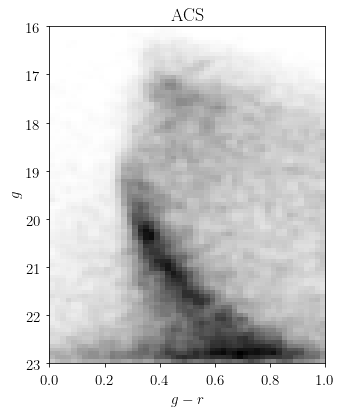

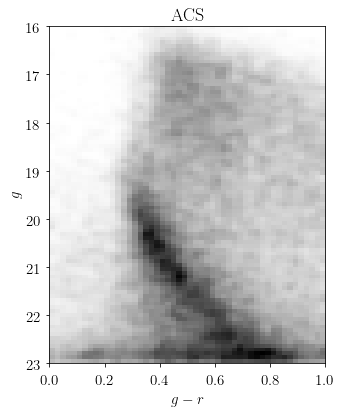

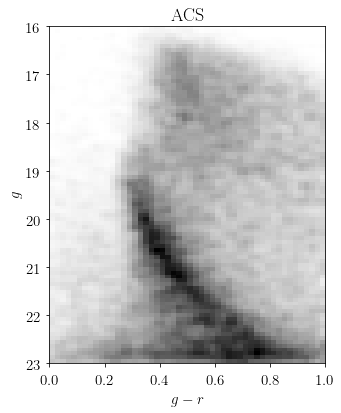

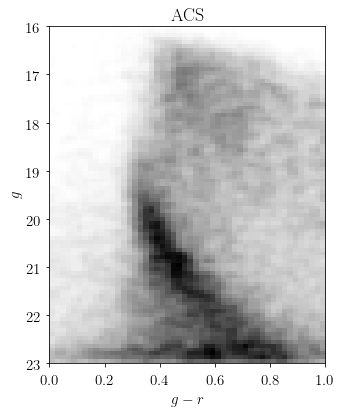

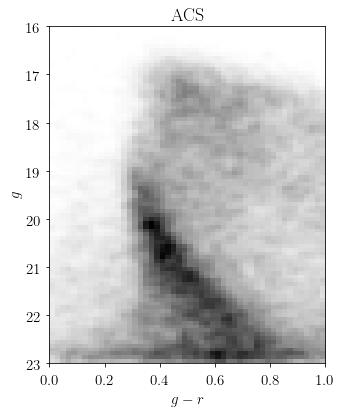

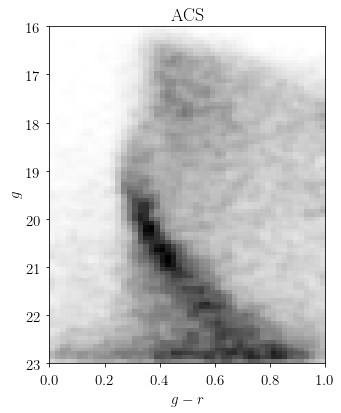

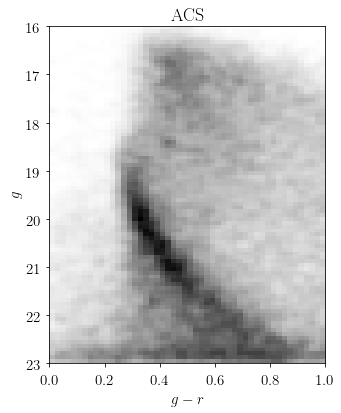

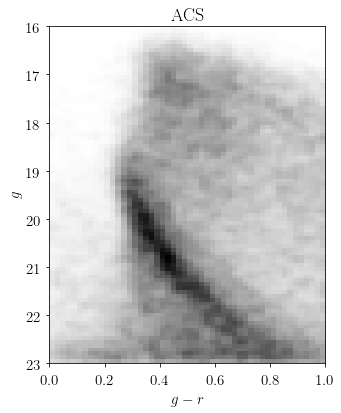

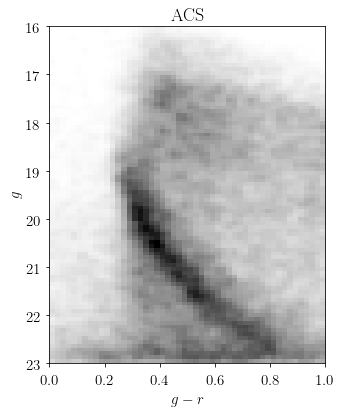

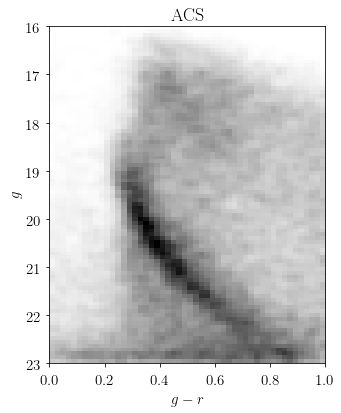

In [270]:
for i in np.arange(-60,20, 4):    
    on = (phi1 > i) & (phi1 < i+4) & (phi2 > -3) & (phi2 < 2.5)
    # off = (phi1 > -3) & (phi1 < -1) & (np.abs(phi2) > 1) & (np.abs(phi2) < 1.5)
    # off1 = (phi1 > -3) & (phi1 < -1) & (phi2 > 1) & (phi2 < 1.5)
    off = (phi1 > i) & (phi1 < i+1) & (phi2 < -8) & (phi2 > -10)

    # import plot_hess
    # reload(plot_hess)

    mu, age, z = 15.5, 12, 0.0001
    iso = filter_data.isochrone_factory('Dotter', age=age, distance_modulus=mu, z=z)


    # plot_hess.plot_hess('NEW1', data[on], data[off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)
    # plot_hess.plot_hess('NEW1', data[on], data[off1], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)
    # plot_hess.plot_hess('NEW1', data[on], data[off2], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)
    plot_hess.plot_hess('ACS', data[on], None, gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.02, dy=0.08)
    # plt.plot(iso.color, iso.mag+mu)
    # plt.xlim(0,1)
    # plt.ylim(23,16)
    # plot_hess.plot_hess('ACS', data[off], None, gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.02, dy=0.08)
    # plt.plot(iso.color, iso.mag+mu)
    plt.xlim(0,1)
    plt.ylim(23,16)
    plt.savefig('../plots/acs_%.2f_%.2f.png' %(i, i+4))

# NEW 1

In [49]:
ends = [(255, 48), (205, 53)]

R = streamlib.get_rotmat(ends=ends)
print(R)

[[-0.37335248 -0.46793845  0.8010253 ]
 [ 0.68500697 -0.7213447  -0.10211397]
 [ 0.62559841  0.51058342  0.58985693]]


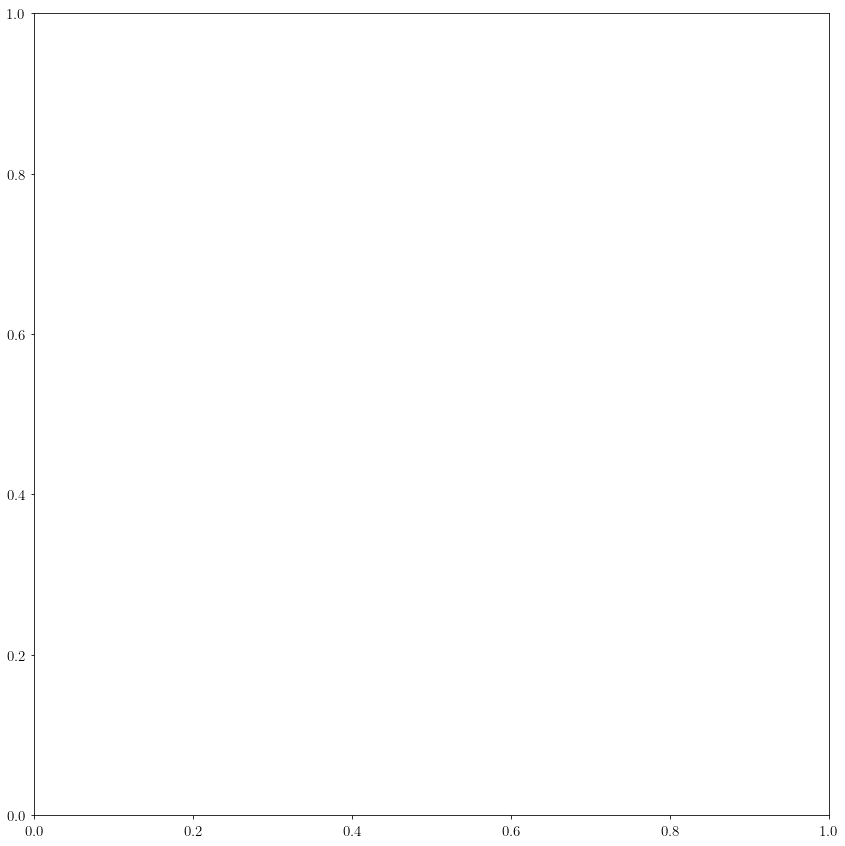

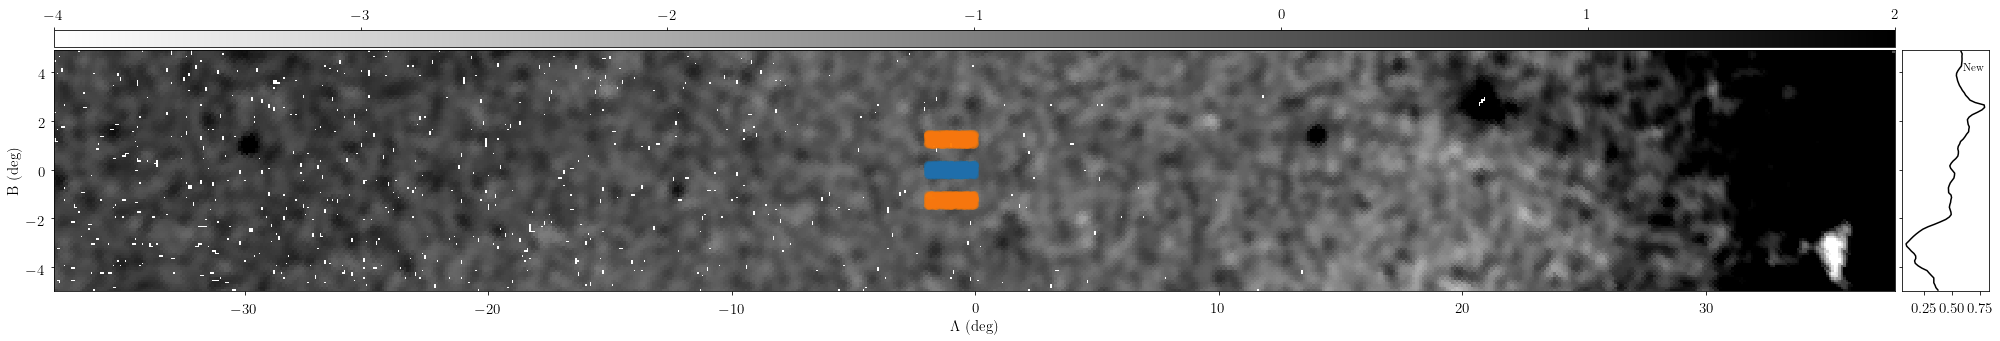

In [151]:
reload(plot_density)
reload(streamlib)
ends = [(255, 48), (205, 53)]
for mu in [15]:
    ax = plot_density.plot_stream_zoom(hpxcube, fracdet, modulus, stream=None, ends=ends, mu=mu, width=0.3, sigma=0.2, delta=0.1, vmin=-4, vmax=2)
    plt.sca(ax)
    plt.scatter(phi1[on], phi2[on], alpha=0.1)
    plt.scatter(phi1[off], phi2[off], alpha=0.1)
    # plt.savefig('../plots/%.1f_%.1f_%.1f_%.1f_%.1f.png' %(ends[0][0], ends[0][1], ends[1][0], ends[1][1], mu))

In [112]:
data = fitsio.open('../data/new1_data.fits')[1].data
data_new1 = np.copy(data)

In [113]:
import rotation_matrix
phi1, phi2 = rotation_matrix.phi12_rotmat(data['RA'], data['DEC'], R)

-10 -8


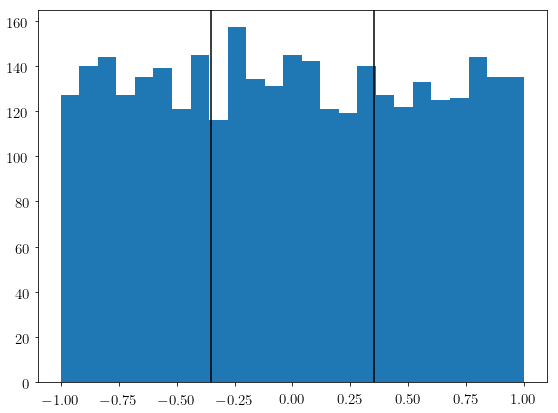

-9 -7


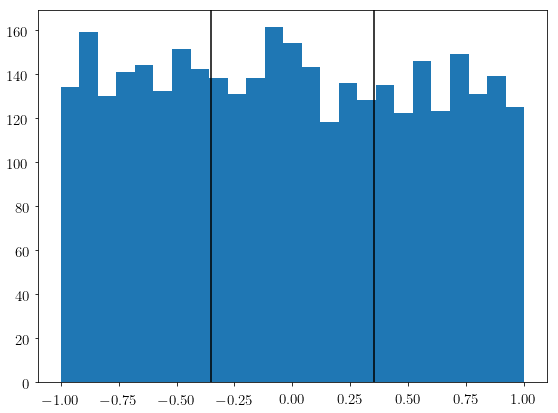

-8 -6


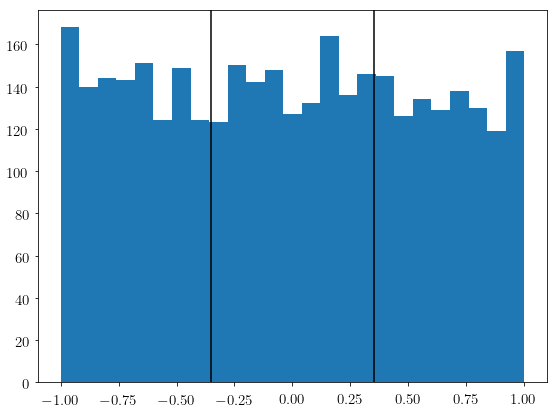

-7 -5


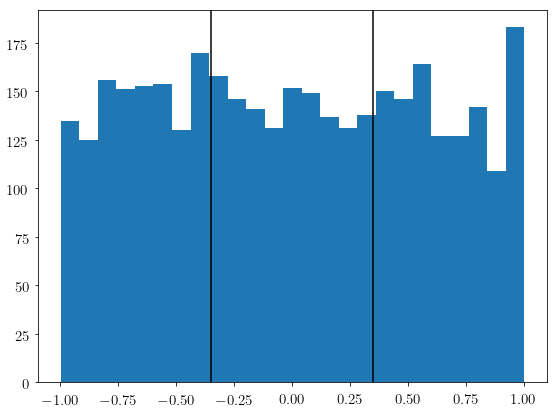

-6 -4


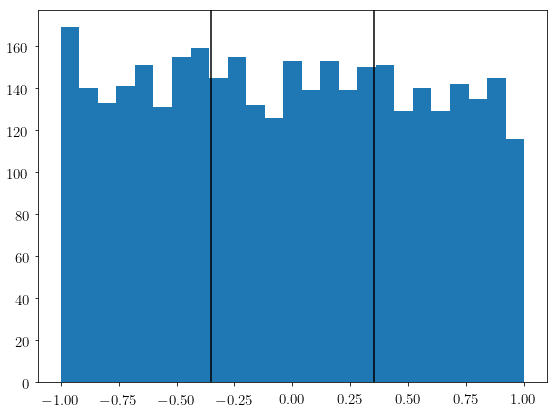

-5 -3


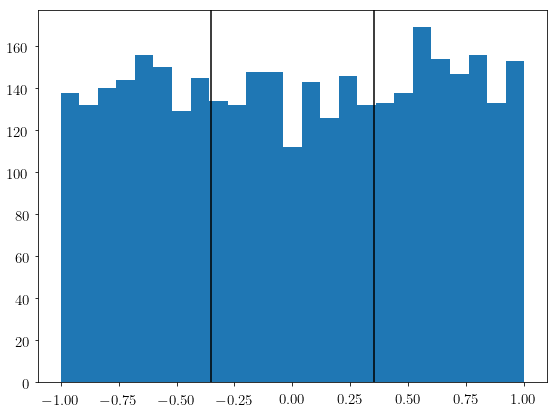

-4 -2


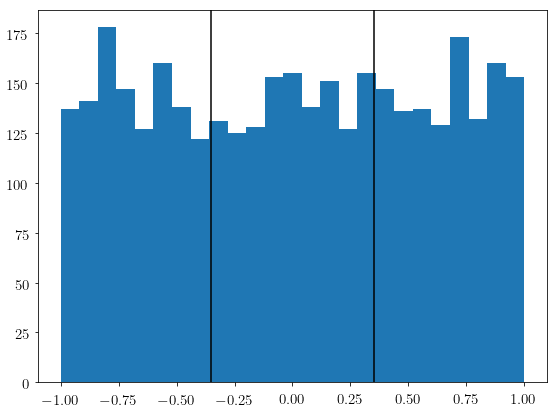

-3 -1


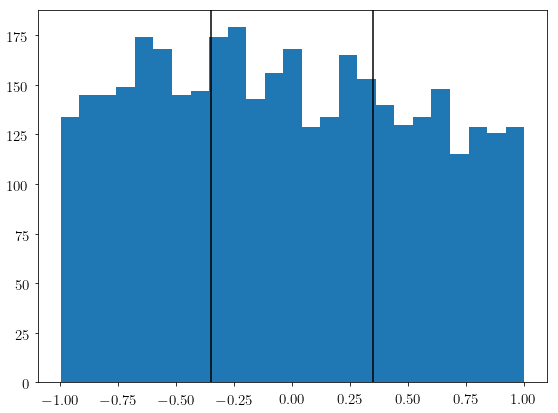

-2 0


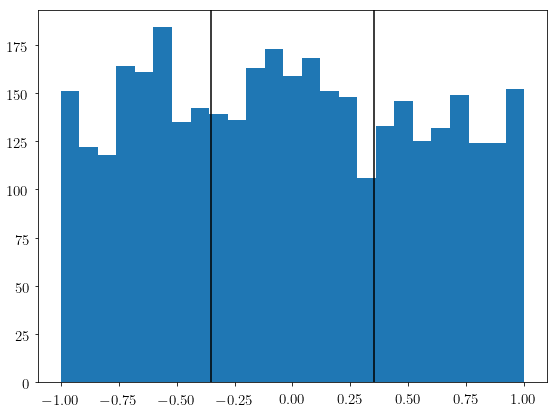

-1 1


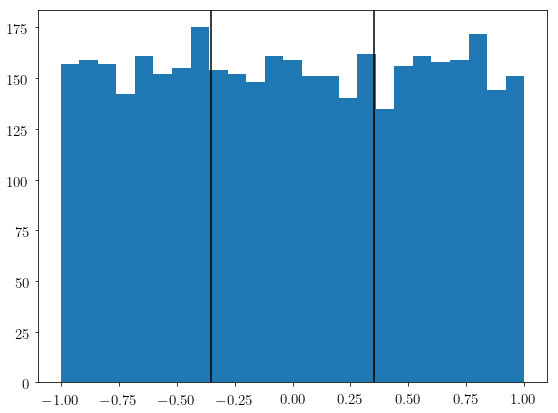

0 2


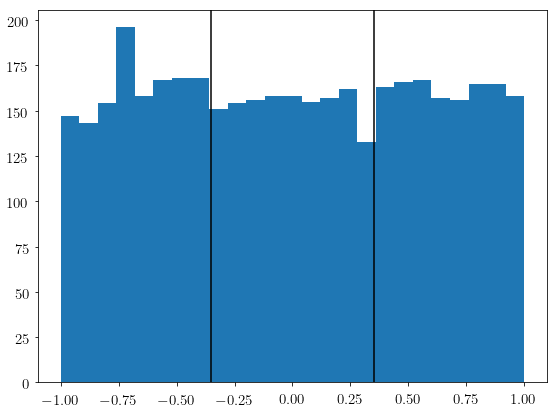

1 3


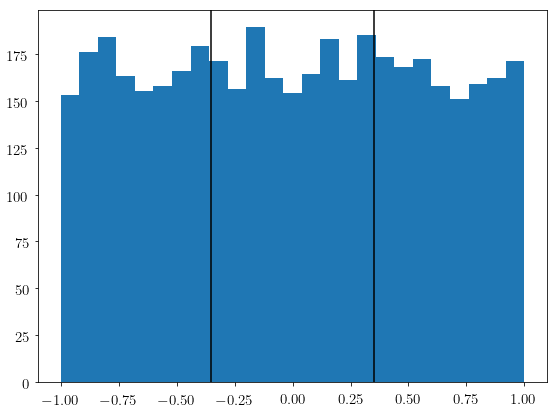

2 4


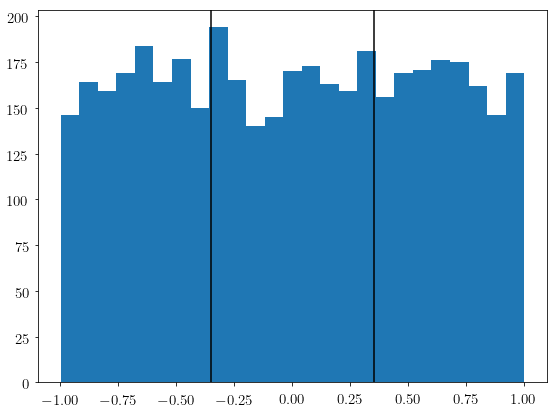

3 5


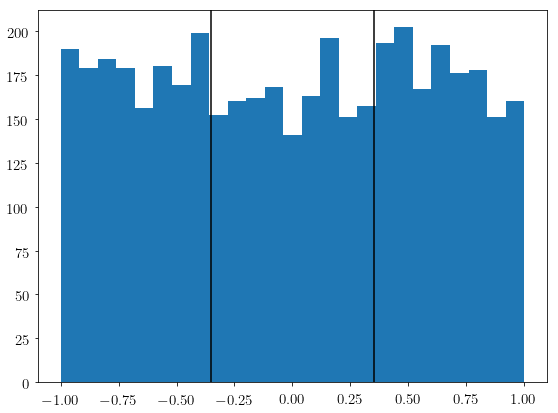

4 6


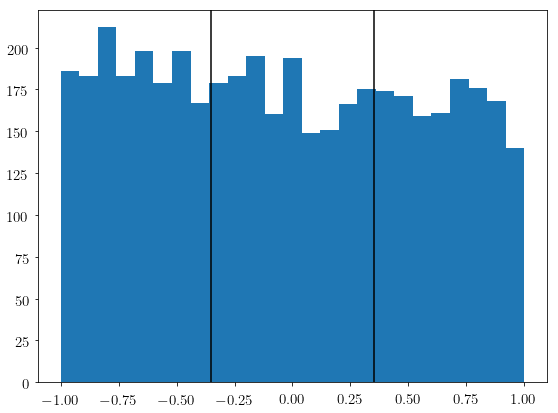

5 7


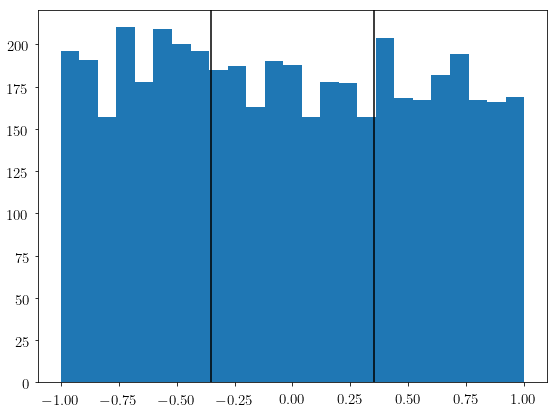

6 8


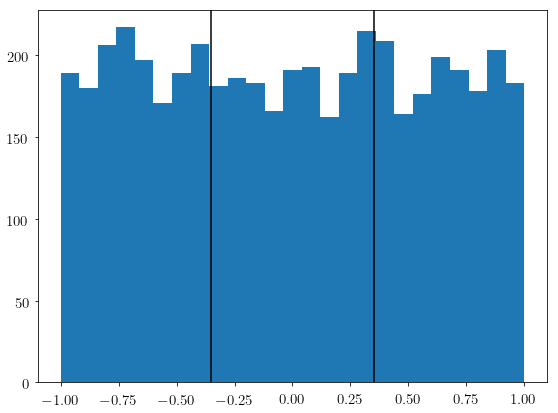

7 9


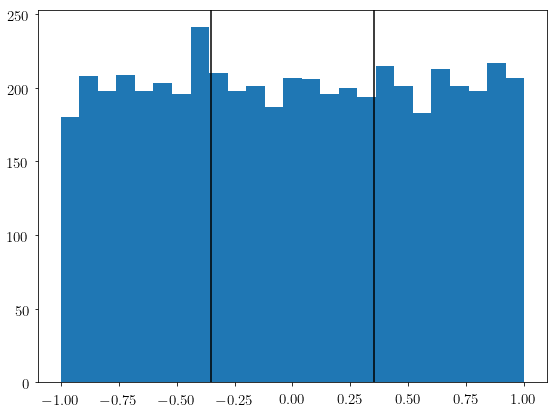

8 10


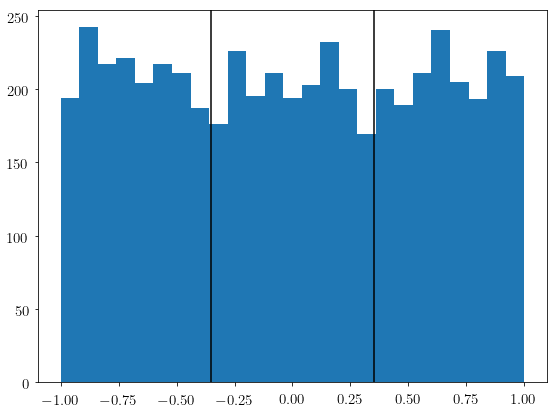

9 11


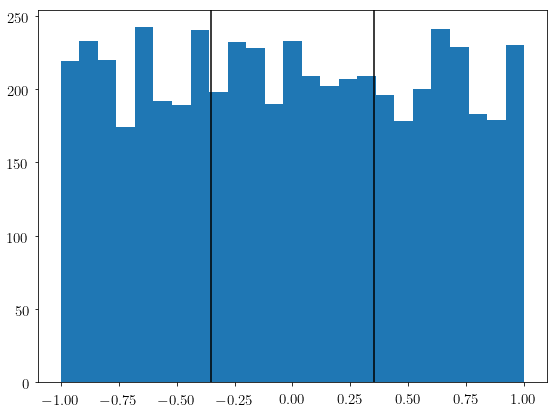

In [124]:
for i in np.arange(-10,10):    
    plt.figure(figsize=(8,6))
    print(i, i+2)
    plt.hist(phi2[on & (phi1 > i) & (phi1 < (i + 1))], bins=25)
    plt.axvline(-0.35, c='k')
    plt.axvline(0.35, c='k')
    # plt.ylim(250,350)
    plt.show()

In [132]:
on = (phi1 > -2) & (phi1 < 0) & (np.abs(phi2) < 0.25)
off = (phi1 > -2) & (phi1 < 0) & (np.abs(phi2) > 1) & (np.abs(phi2) < 1.5)
off1 = (phi1 > -2) & (phi1 < 0) & (phi2 > 1) & (phi2 < 1.5)
off2 = (phi1 > -2) & (phi1 < 0) & (phi2 < -1) & (phi2 > -1.5)

In [134]:
0.2 / 5., 1. / 6.

(0.04, 0.16666666666666666)

(23, 16)

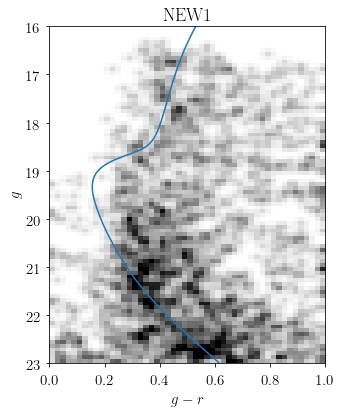

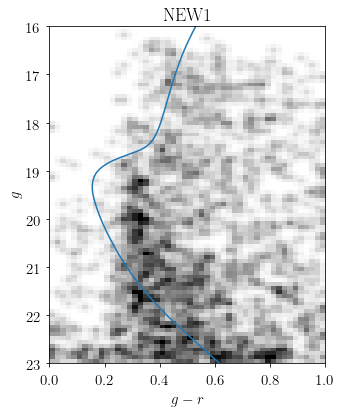

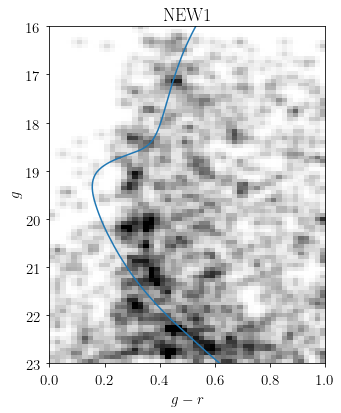

In [148]:
import plot_hess
reload(plot_hess)

mu, age, z = 15.5, 12, 0.0001
iso = filter_data.isochrone_factory('Dotter', age=age, distance_modulus=mu, z=z)


# plot_hess.plot_hess('NEW1', data[on], data[off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)
# plot_hess.plot_hess('NEW1', data[on], data[off1], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)
# plot_hess.plot_hess('NEW1', data[on], data[off2], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)
plot_hess.plot_hess('NEW1', data[on], None, gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, vmin=0, vmax=2, dx=0.02, dy=0.08)
plt.plot(iso.color, iso.mag+mu)
plt.xlim(0,1)
plt.ylim(23,16)
plot_hess.plot_hess('NEW1', data[off1], None, gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, vmin=0, vmax=2, dx=0.02, dy=0.08)
plt.plot(iso.color, iso.mag+mu)
plt.xlim(0,1)
plt.ylim(23,16)
plot_hess.plot_hess('NEW1', data[off2], None, gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, vmin=0, vmax=2, dx=0.02, dy=0.08)
plt.plot(iso.color, iso.mag+mu)
plt.xlim(0,1)
plt.ylim(23,16)


# mu, age, z = 15, 12, 0.0001
# iso = filter_data.isochrone_factory('Dotter', age=age, distance_modulus=mu, z=z)

# plot_hess.plot_hess('NEW1', data[on], data[off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)
# plt.plot(iso.color, iso.mag+mu)
# plt.xlim(0,1)
# plt.ylim(23,16)
# plot_hess.plot_hess('NEW1', data[on], data[off1], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)
# plt.plot(iso.color, iso.mag+mu)
# plt.xlim(0,1)
# plt.ylim(23,16)
# plot_hess.plot_hess('NEW1', data[on], data[off2], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)
# plt.plot(iso.color, iso.mag+mu)
# plt.xlim(0,1)
# plt.ylim(23,16)


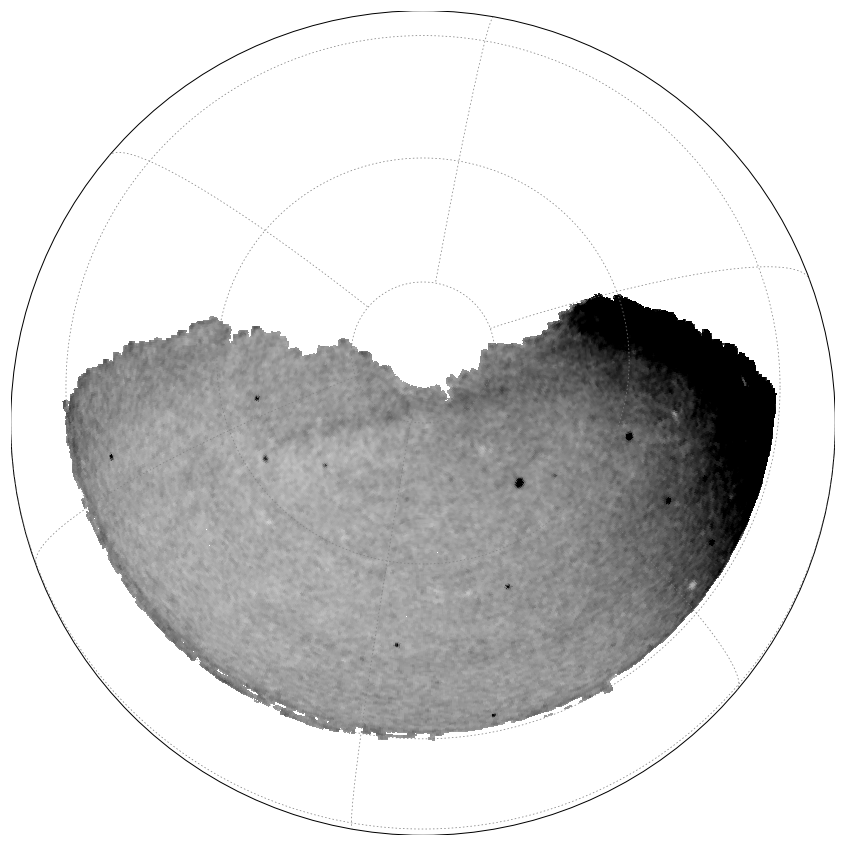

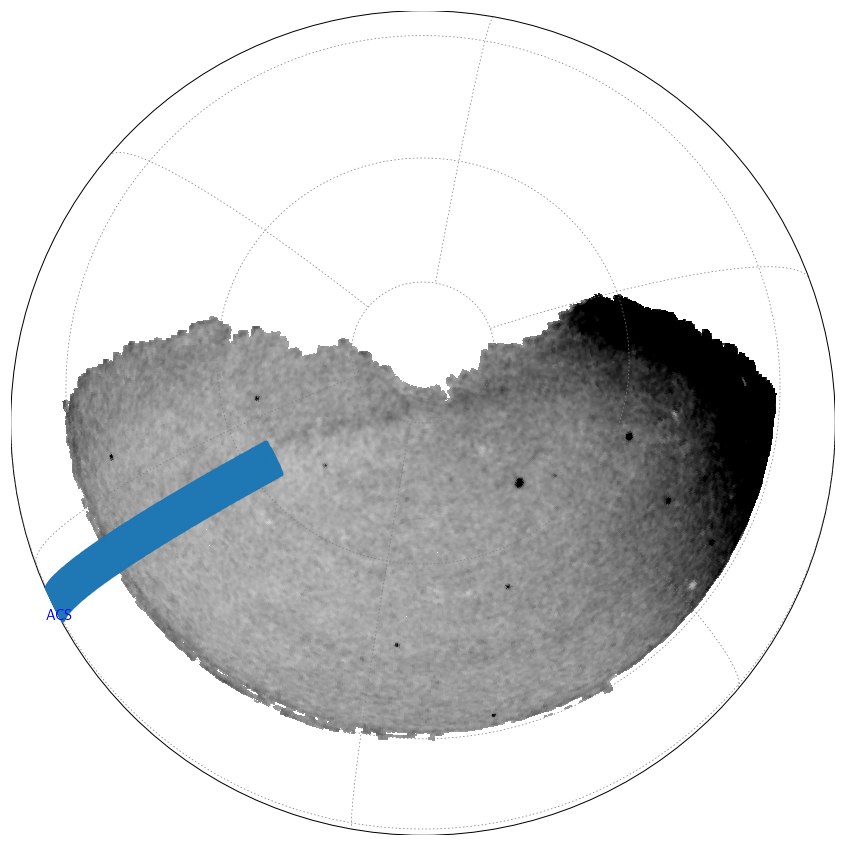

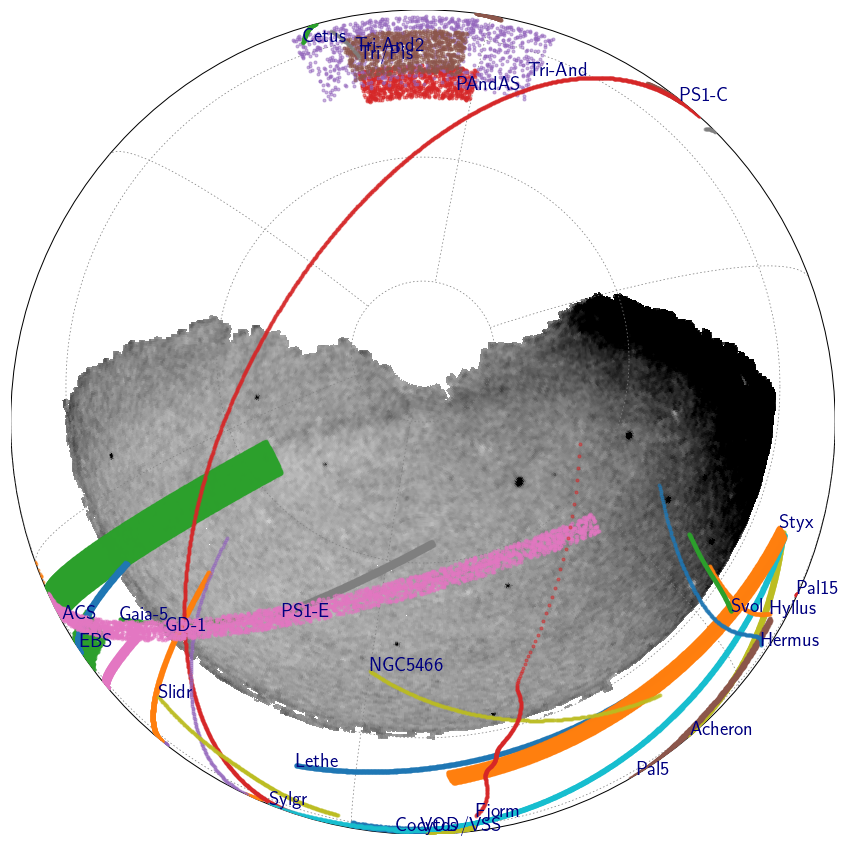

In [47]:
reload(plot_density)
coords='cel'
lon, lat = 190, 80
vmin, vmax = 0, 18
xsize = 1000
sigma = 0.2
mu = 16

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)

smap = plot_density.plot_density(data, 0, center=(lon,lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)
smap = plot_density.plot_density(data, 0, center=(lon, lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize)
plot_density.plot_stream_list(smap, ['ACS'], coords=coords)

smap = plot_density.plot_density(data, 0, center=(lon, lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)
plot_density.plot_streams(smap, mu, 50, coords=coords)

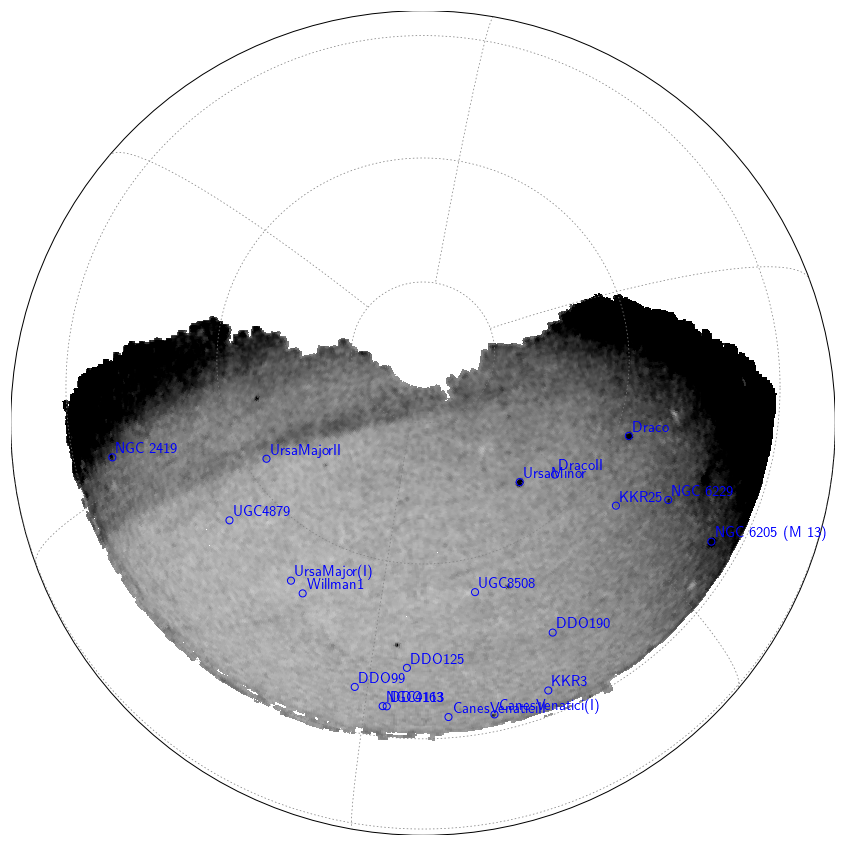

In [46]:
smap = plot_density.plot_density(data, 0, center=(lon, lat), vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize, smooth=sigma)
plot_density.plot_dwarfs_globs(smap, data, mu, 50, coords=coords, coord_stream=stream)

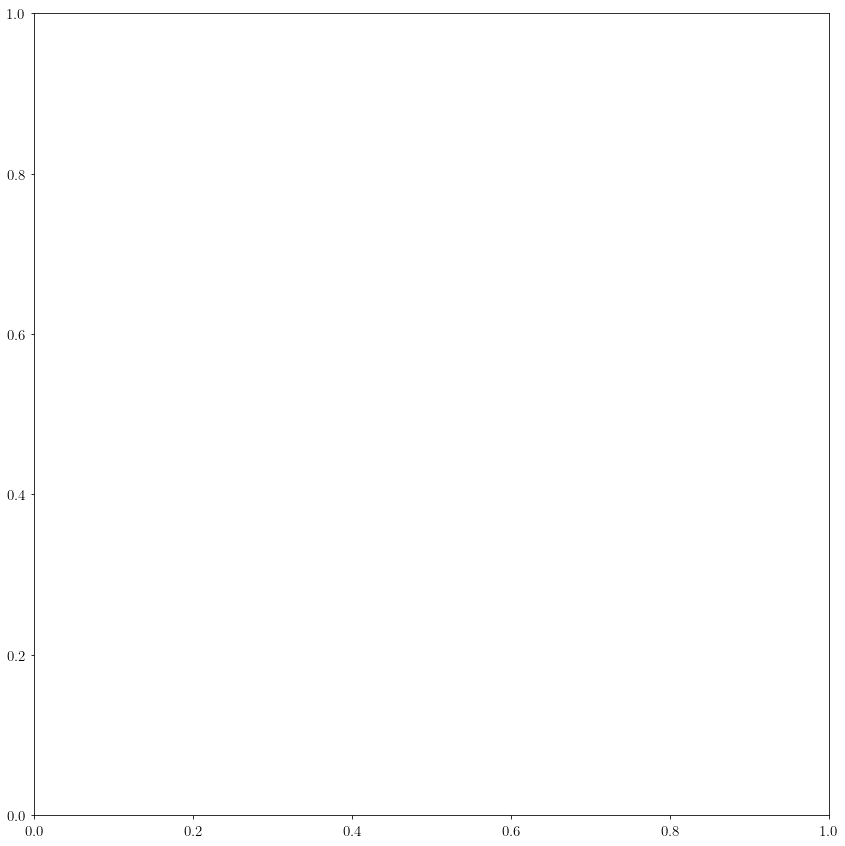

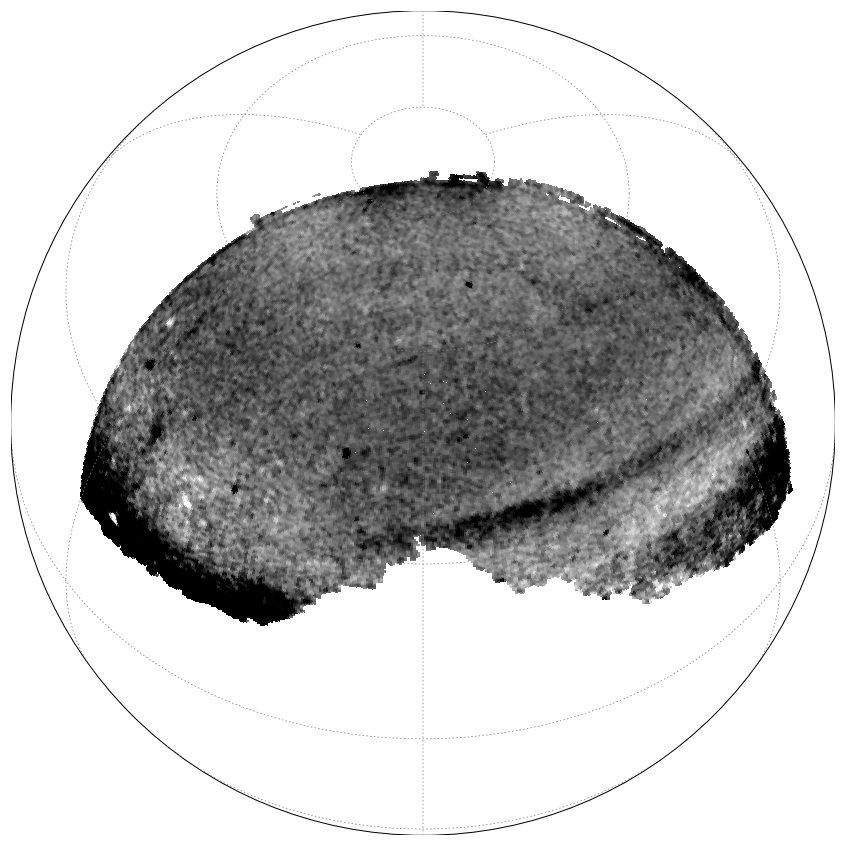

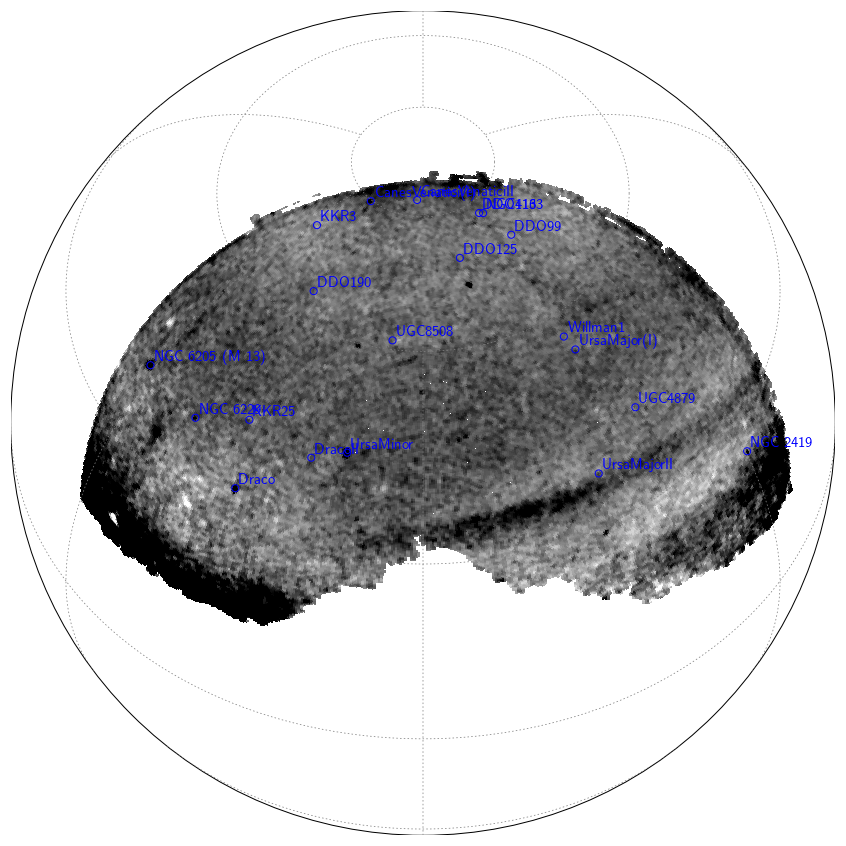

In [20]:
reload(plot_density)
reload(streamlib)
mu = 14.8
coords='gal'
lon, lat = 120, 50
center=(lon,lat)
background_center=(190, 80)
# vmin, vmax = 0, 18
vmin, vmax = -5, 3
xsize = 1000
sigma = 0.2
proj = 'ortho'

# coords = 'gal'
# lon, lat = 120, 50
# vmin, vmax = -5, 3
# xsize = 1000
# sigma = 0.2
# version = 0
# filename = '../data/bass_dr8_iso_hpxcube_v%i.fits.gz' % version
# movdir = '../plots/bass/v%i/' % version
# center = (lon, lat)
# coord_stream = None


stream = coord_stream = None

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
bkg = plot_density.fit_background(data, center=background_center, coords=coords, coord_stream=coord_stream, sigma=sigma, deg=5)
smap = plot_density.plot_density(data, bkg, coord_stream=coord_stream, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=xsize, smooth=sigma)

# x, y = smap(lon, lat)
# smap.plot(x, y, 'r*', ms=20)
# smap = plot_density.plot_density(data, 0, center=(lon, lat), vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=xsize, smooth=sigma)
# plot_density.plot_stream_list(smap, ['ACS'], coords=coords)

# smap = plot_density.plot_density(data, bkg, center=(lon, lat), vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=xsize, smooth=sigma)
# plot_density.plot_streams(smap, mu, 50, coords=coords)

smap = plot_density.plot_density(data, bkg, center=(lon, lat), vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=xsize, smooth=sigma)
plot_density.plot_dwarfs_globs(smap, data, mu, 50, coords=coords, coord_stream=stream)

(-169.77334425075557, 32.85809289453853)
14.746950033224564


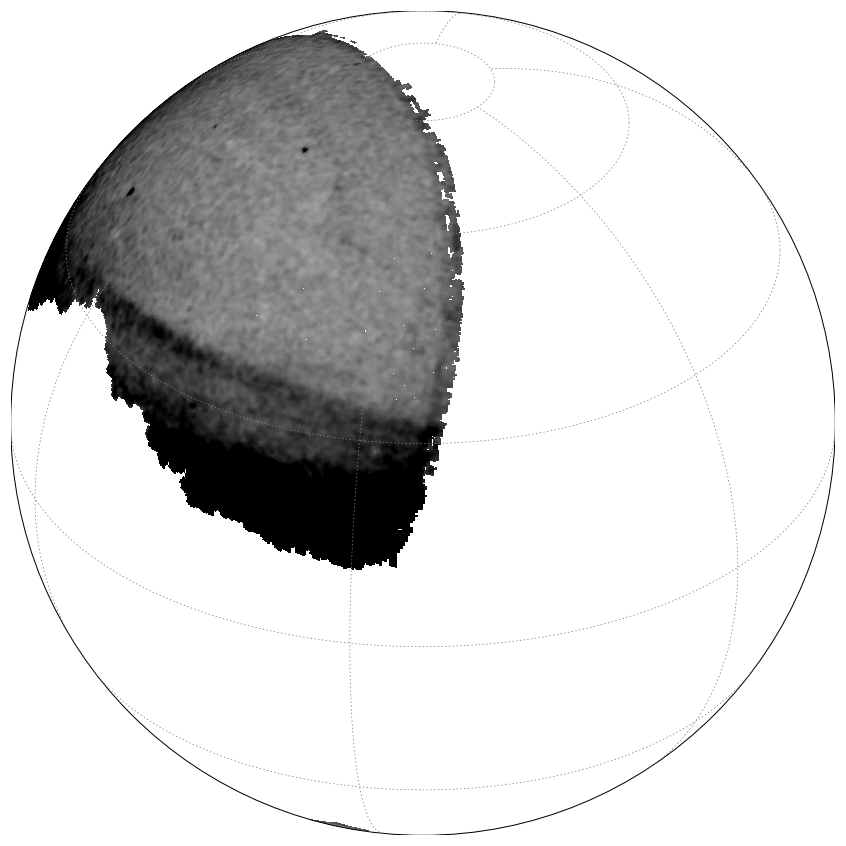

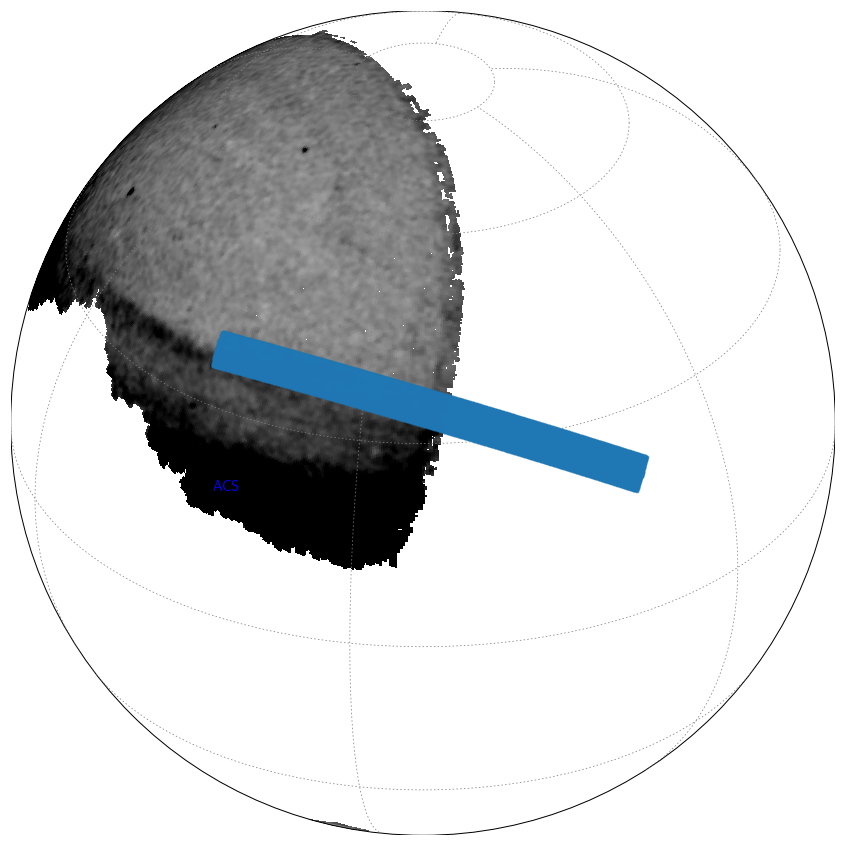

In [43]:
reload(plot_density)
reload(streamlib)

stream = 'ACS'
coords= 'gal'
sigma = 0.3
proj = 'ortho'

# mw_streams = galstreams.MWStreams(verbose=False)
if coords == 'cel':
    center = (mw_streams[stream].ra.mean(), mw_streams[stream].dec.mean())
elif coords == 'gal':
    center = (mw_streams[stream].l.mean(), mw_streams[stream].b.mean())
elif coords == 'stream':
    center = 0, 0
if center[0] > 180:
    center = (center[0] - 360, center[1])
print(center)

mu = plot_density.dist2mod(mw_streams[stream].Rhel[0])
print(mu)

vmin = 0
vmax = 12
xsize = 1000

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
# # bkg = plot_density.fit_background(data, center=center, coords=coords, coord_stream=stream, sigma=sigma, deg=5)
bkg = 0
smap = plot_density.plot_density(data, 0, center=center, vmin=vmin, vmax=vmax, coords=coords, coord_stream=stream, proj=proj, xsize=xsize, smooth=sigma)
# smap = plot_density.plot_density(data, bkg, coord_stream=stream, center=center, vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize)
# smap = plot_density.plot_density(data, 0, center=center, vmax=10, coords='cel', proj='ortho', xsize=xsize=600)

smap = plot_density.plot_density(data, bkg, coord_stream=stream, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=xsize, smooth=sigma)
plot_density.plot_stream_list(smap, [stream], coords=coords, coord_stream=stream)

# smap = plot_density.plot_density(data, bkg, coord_stream=stream, center=center, vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize)
# plot_density.plot_streams(smap, mu, 50, coords=coords, coord_stream=stream)

# smap = plot_density.plot_density(data, bkg, coord_stream=stream, center=center, vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize)
# plot_density.plot_dwarfs_globs(smap, data, mu, 50, coords=coords, coord_stream=stream)

In [18]:
# reload(plot_density)
# plot_density.plot_stream_zoom('ATLAS', hpxcube, fracdet, modulus, width=0.3, sigma=0.3)

(174.2130001578574, 55.226774260901266)
15.501852725587813


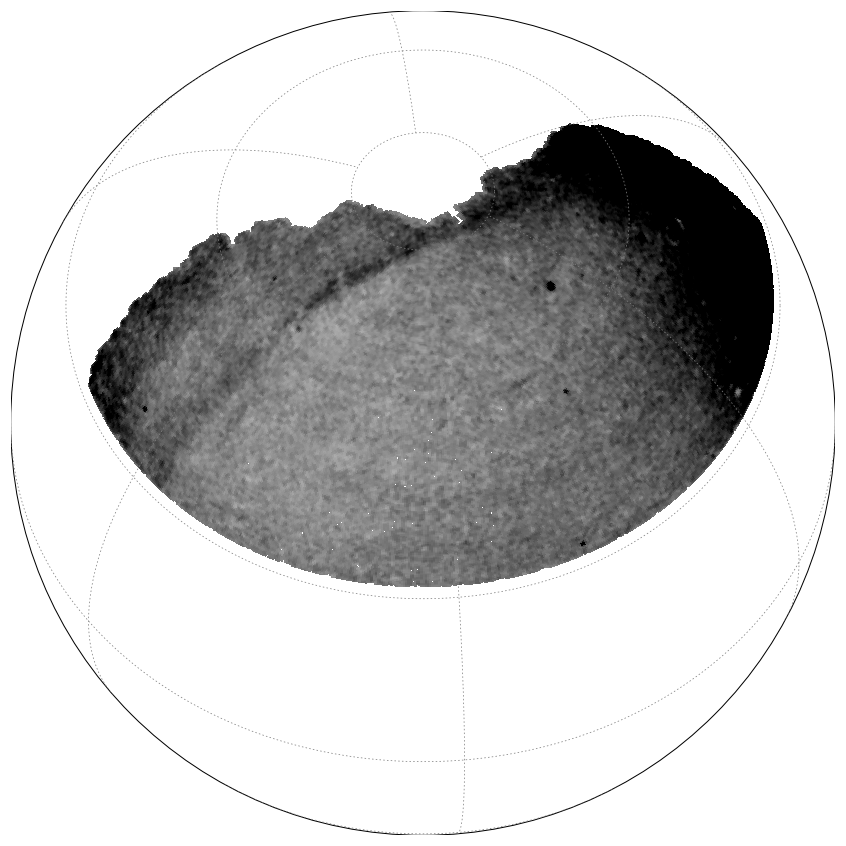

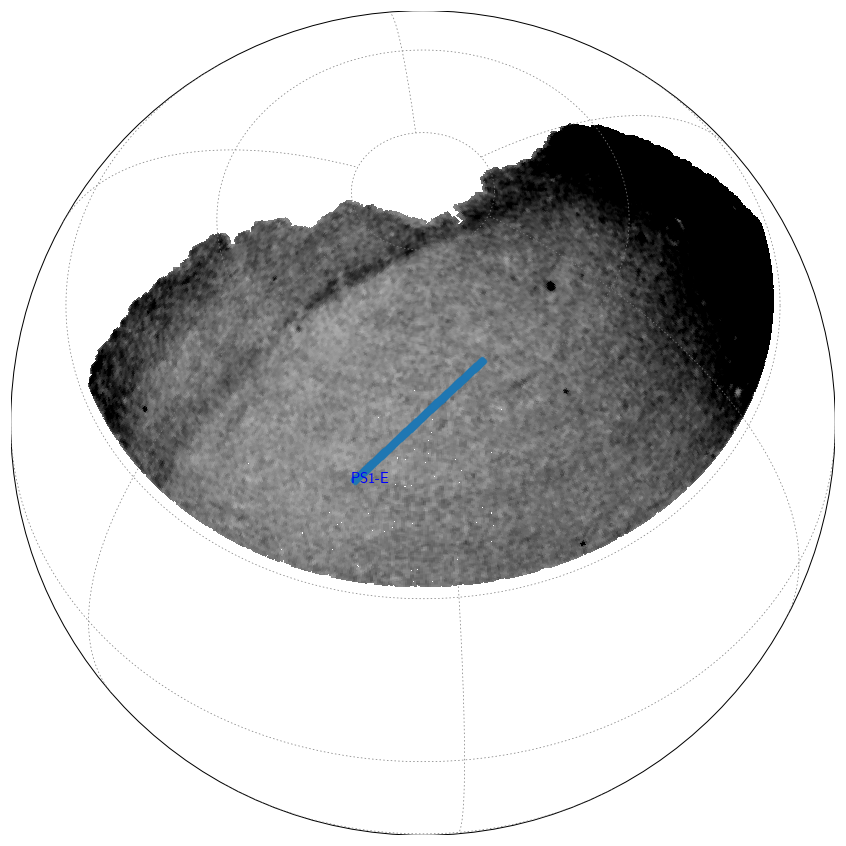

In [14]:
reload(plot_density)
reload(streamlib)

stream = 'PS1-E'
coords= 'cel'
sigma = 0.2
proj = 'ortho'

# mw_streams = galstreams.MWStreams(verbose=False)
if coords == 'cel':
    center = (mw_streams[stream].ra.mean(), mw_streams[stream].dec.mean())
elif coords == 'gal':
    center = (mw_streams[stream].l.mean(), mw_streams[stream].b.mean())
elif coords == 'stream':
    center = 0, 0
if center[0] > 180:
    center = (center[0] - 360, center[1])
print(center)

mu = plot_density.dist2mod(mw_streams[stream].Rhel[0])
print(mu)

vmin = 0
vmax = 10
xsize = 1000

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
# # bkg = plot_density.fit_background(data, center=center, coords=coords, coord_stream=stream, sigma=sigma, deg=5)
bkg = 0
smap = plot_density.plot_density(data, 0, center=center, vmin=vmin, vmax=vmax, coords=coords, coord_stream=stream, proj=proj, xsize=xsize, smooth=sigma)
# smap = plot_density.plot_density(data, bkg, coord_stream=stream, center=center, vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize)
# smap = plot_density.plot_density(data, 0, center=center, vmax=10, coords='cel', proj='ortho', xsize=xsize=600)

smap = plot_density.plot_density(data, bkg, coord_stream=stream, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=xsize, smooth=sigma)
plot_density.plot_stream_list(smap, [stream], coords=coords, coord_stream=stream)

# smap = plot_density.plot_density(data, bkg, coord_stream=stream, center=center, vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize)
# plot_density.plot_streams(smap, mu, 50, coords=coords, coord_stream=stream)

# smap = plot_density.plot_density(data, bkg, coord_stream=stream, center=center, vmin=vmin, vmax=vmax, coords=coords, proj='ortho', xsize=xsize)
# plot_density.plot_dwarfs_globs(smap, data, mu, 50, coords=coords, coord_stream=stream)